# Module 2: Hydrostatics 

The exercises in this module range from lecture 4 to lecture 9.

In [3]:
!pip install handcalcs -q
!pip install Pillow -q

In [4]:
import handcalcs.render
from sympy import symbols, Eq, solve
from math import sqrt,pi, cos, sin, radians,asin,atan,degrees, tan, log10
from PIL import Image

Global variables:

In [5]:
%%render param
g=9.81 #m/s2
rho_water=1000 #kg/m3
rho_Hg=13600 #kg/m3
p_atm=101325 #Pa

<IPython.core.display.Latex object>

## Problems for Lecture 4: Introduction to Hydrostatics

### Absolute Pressure, Gauge Pressure and Pressure  Head

---
#### Question 1 (*)[R]

The weather report states that the current atmospheric pressure is 970 mbar.  
a) Express the pressure as an absolute pressure measured in Pa. {97 kPa}  
b) Express the pressure as an absolute pressure head of water. {9.89 m}  
c) Express the pressure as a absolute pressure head of mercury (assume the density of mercury to be 13 600 kg/m<sup>3</sup>). {0.73 m}

**Given:**

In [4]:
%%render param
p_mbar=970 #mbar

<IPython.core.display.Latex object>

a)

**Hint**

```{toggle}
Consider the following unit conversions:  

$$ p[bar]=p[mbar]*10^{-3}$$  
$$ p[kPa]=p[bar]*100$$  
$$ p[Pa]=p[kPa]*1000$$  
```

**Solution**

In [5]:
%%render long 2
p_bar= p_mbar*10**-3 #bar
p_kPa= p_bar*100 #kPa
p_Pa= p_kPa*1000 #Pa

<IPython.core.display.Latex object>

b)

**Hint**

```{toggle}
The absolute pressure head of water can be calulated as:  

$$h=\frac{p}{\rho_{water}*g}$$
```

**Solution**

In [6]:
%%render long 2
h_water= p_Pa/(rho_water*g) #m

<IPython.core.display.Latex object>

c)

**Hint**

```{toggle}
The absolute pressure head of mercury can be calulated as:  

$$h=\frac{p}{\rho_{Hg}*g}$$
```

**Solution**

In [7]:
%%render 2
h_Hg= p_Pa/(rho_Hg*g) #m

<IPython.core.display.Latex object>

---
#### Question 2(*)

 If the pressure in a tank is 500 kPa. Find the equivalent pressure head of a) water b) mercury with density 13 600 kg/m<sup>3</sup> and c) heavy fuel oil with a specific gravity of 0.92. {51 m, 3.7 m, 55.4 m}

**Given:**

In [8]:
%%render param
p=500 #kPa
rho_Hg_=13600 #kg/m3
s=0.92

<IPython.core.display.Latex object>

**Hint**

```{toggle}
The equation that relates the presure and height is the following $p=\rho g h$ in this equation the units are the following $p=[Pa], \rho=[kg/m^3], g= [m/s^2], h=[m]$

The specific gravity of a fluid is $S= \frac {\rho_{liquid}}{\rho_{water}}$
```

a)

**Solution**

Considering the above equation, the units of $p$ should be change from [kPa] to [Pa]

In [150]:
%%render long 2
p_Pa=p*1000 #Pa
h_water= p_Pa/(g*rho_water) #m

<IPython.core.display.Latex object>

b)

**Solution**

In [10]:
%%render long 2
h_Hg= p_Pa/(g*rho_Hg_) #m

<IPython.core.display.Latex object>

c)

**Solution**

By using the equation of specific gravity the $\rho_{oil}$ can be calculated assuming a $ \rho_{water}=1000 kg/m^3$

In [11]:
%%render long 2
rho_oil= s*rho_water #kg/m3
h_oil= p_Pa/(g*rho_oil) #m

<IPython.core.display.Latex object>

---
#### Question 3 (**)[R]

If the atmospheric pressure is 780 mbar and a gauge attached to a tank reads 330 mm Hg vacuum, what is the absolute pressure within the tank? Assume s<sub>Hg</sub> = 13.56. {34 kPa}

**Given:**

In [12]:
%%render param 2
s_Hg=13.56
h=330/1000 #m
p_atm_=78000 #Pa

<IPython.core.display.Latex object>

**Hint**

```{toggle}
The absolute pressure can be calculated as $p_{abs}=p_{atm}+p_{gauge}$  

$p_{atm}$ is given and $p_{gauge}$ can be calculated as $p_{gauge}=\gamma * h$  ,

where $h$ is given and $\gamma = \rho_{Hg}*h$  

Remember that $\rho_{Hg}=s_{Hg}*\rho_{water}$
```

**Solution**

In [13]:
%%render long 2
rho_Hg= s_Hg*rho_water #kg/m3
gamma= rho_Hg*g #N/m3
p_gauge= gamma*h #Pa
p_abs= p_atm_+(-p_gauge) #Pa
p_abs_kPa= p_abs/1000 #kPa

<IPython.core.display.Latex object>

---
#### Question 4 (***)

A pressure gauge is connected to a tank filled with fluid under standard sea level conditions. The gauge shows a reading of 305 kPa. The gauge is then enclosed in a chamber as shown below, and the absolute pressure head in the chamber reduced to 100 mm Hg (the fluid pressure remains unchanged). What will the reading on the pressure gauge now be? {393 kPa}

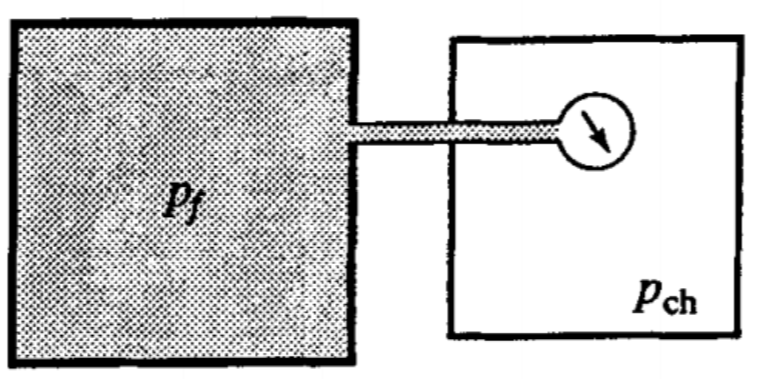

In [14]:
from PIL import Image
img = Image.open(r"figures/30.png")
img

**Given:**

In [15]:
%%render param
p_gauge= 305 #kPa
h= 100 #mmHg 

<IPython.core.display.Latex object>

**Hint**

```{toggle}
The absolute pressure can be calculates as $ p_{abs}= p_{atm}+ p_{gauge}$. 

The units of the three pressure should be in [Pa]. For that reason, a unit conversion must be done for $p_{gauge}$ 

The atmosphere now changed to 100 mmHg absolute, so with this a new atmospheric pressure can be calculated. To calculate the pressure in the chamber considering the height of the fluid the following equation should be used: $p=\rho g h$ in this equation the units are the following $p=[Pa], \rho=[kg/m^3], g= [m/s^2], h=[m]$

For that reason, a unit conversion must be done for $h_{Hg}$

To calculate the new gauge pressure the following equation should be used $ p_{abs}= p_{atm}+ p_{gauge}$. 
```

**Solution**

In [16]:
%%render long 1
p_gauge_Pa= p_gauge*1000 #Pa
p_abs= p_atm+p_gauge_Pa#Pa
h_m= h/1000 #m
p_atm_2= rho_Hg*g*h_m #Pa
p_gauge= p_abs-p_atm_2 #Pa

<IPython.core.display.Latex object>

### Pressure Variation in Incompressible Fluids

---
#### Question 5 (*)

Calculate the gauge and absolute pressures at a depth of 10 m below a water surface under standard sea level conditions. {98.1 kPa, 199.4 kPa}

**Given:**

In [17]:
%%render param
h= 10 #m

<IPython.core.display.Latex object>

**Hint**

```{toggle}
The absolute pressure under standard sea level conditions is 101325 Pa and the gauge pressure can be calculated as $p_{gauge}=\rho_{water}*g * h$  

The absolute pressure can be calculated as $ p_{abs}= p_{atm}+ p_{gauge}$  
```

**Solution**

In [151]:
%%render long 1
p_gauge= rho_water*g*h #Pa
p_abs= p_atm+p_gauge #Pa

<IPython.core.display.Latex object>

---
#### Question 6 (*)[R]

The pressure vessel below contains glycerine to a depth of 2 m under pressure as shown. Find the pressure at the bottom of the tank. {74.68 kPa}

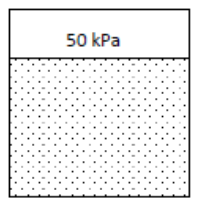

In [19]:
from PIL import Image
img = Image.open(r"figures/32.png")
img

**Given:**

In [20]:
%%render param
h = 2 #m
p_top=50 #kPa

<IPython.core.display.Latex object>

**Hint**

```{toggle}

The first step is read the density of glycerine in Table A.4

To calculate the pressure of the glycerine the following equation should be used:  $p=\rho g h$ in this equation the units are the following $p=[Pa], \rho=[kg/m^3], g= [m/s^2], h=[m]$. 

To calculate the pressure at the bottom of the tank, the pressure at the top and the pressure due to the glycerine should be added $p_{bottom}= p_{top}+p_{glycerine}$
```

**Solution**

In [21]:
%%render long 2
rho_glycerine=1258 #kg/m3
p_top_Pa= p_top*1000 #Pa
p_bottom= p_top_Pa+rho_glycerine*g*h #Pa

<IPython.core.display.Latex object>

---
#### Question 7 (**)[R]

An open tank contains 10 m of water, covered with 1 m of oil with s = 0.80. Find the absolute pressure at (a) the interface between the two fluids and (b) the bottom of the tank. {109.1 kPa; 207.2 kPa}

**Given:**

In [22]:
%%render param
h_water= 10 #m
h_oil= 1 #m
s_oil= 0.8

<IPython.core.display.Latex object>

a)

**Hint**

```{toggle}
The absolute pressure can be calculated as $ p_{abs}= p_{atm}+ p_{gauge}$  

where the absolute pressure can be assumed as 101325 Pa since it is an open tank and the gauge pressure at the interface between the two fluids can be calculated as $p_{gauge}=\rho_{oil}*g * h_{oil}$  

Remeber that $\rho_{oil}=s_{oil}*\rho_{water}$
```

**Solution**

In [23]:
%%render long 2
rho_oil= s_oil*rho_water #kg/m3
p_abs1= p_atm+rho_oil*g*h_oil #Pa
p_abs1_= p_abs1/1000 #kPa

<IPython.core.display.Latex object>

b)

**Hint**

```{toggle}
The absolute pressure at the bottom of the tank can be calculated as the sum of the absoulte pressure at the interface of the fluids and the gauge pressure at the bottom of the tank. That is: $ p_{abs2}= p_{abs1}+ p_{gauge}$  

The gauge pressure at the bottom of the tank can be calculated as $p_{gauge}=\rho_{water}*g * h_{water}$  
```

**Solution**

In [24]:
%%render long 2
p_abs2= p_abs1+rho_water*g*h_water #Pa
p_abs2_= p_abs2/1000 #kPa

<IPython.core.display.Latex object>

---
#### Question 8 (**)

A pressure gauge at an elevation 4.8 m on the side of a storage tank containing oil reads 34.7 kPa. Another gauge at elevation 2.2 m reads 57.5 kPa. Calculate the specific weight, density and specific gravity of the oil. {8.77 kN/m<sup>3</sup>; 894 kg/m<sup>3</sup>; 0.894}

**Given:**

In [25]:
%%render param 1
h_1=4.8 #m
P_gauge_1= 34.7 #kPa
h_2=2.2 #m
P_gauge_2= 57.5 #kPa

<IPython.core.display.Latex object>

**Hint**

```{toggle}
The equation of the specific weight, density and specific gravity of the oil are: $\gamma=\frac {\Delta p}{\Delta h}, \rho=\frac {\gamma}{g}, s= \frac {\gamma}{\gamma_{water}}$. 

The units of the variables are: $\gamma= [N/m^3], p= [Pa], h= [m], g = [m/s^2], \rho =[kg/m^3]$

The first step is calculate the pressure and height difference between the two points and then use the equations for the requested parameters
```

**Solution**

In [26]:
%%render long 2
Delta_P= P_gauge_2-P_gauge_1 #kPa
Delta_h= h_1-h_2 #m
gamma= Delta_P/Delta_h #kN/m3
gamma_si=gamma*1000 #N/m3
rho= gamma_si/g #kg/m3
S= rho/(rho_water) 

<IPython.core.display.Latex object>

---
#### Question 9 (**)

A closed vessel containing oil with a density of 830 kg/m<sup>3</sup> under pressure is shown below. The space above the oil is pressurised to 35 kPa above atmospheric pressure. Find the elevation of the oil surface in the attached tube. {6.3 m}

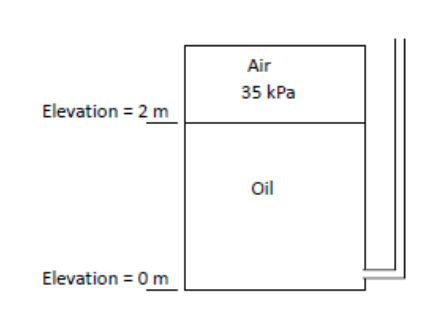

In [27]:
from PIL import Image
img = Image.open(r"figures/35.png")
img

**Given:**

In [28]:
%%render param
rho_oil=830 #kg/m3
h_1=2 #m
p_1=35000 #Pa

<IPython.core.display.Latex object>

**Hint**

```{toggle}
The elevation of the oil is $h_{oil}=h_1+h_2$, where $h_1$ is given and, considering that the pressure is the same at the same heigth in the same fluid, $h_2$ can be calculated as $h_2=\frac{p1}{\rho_{oil}*g}$
```

**Solution**

In [29]:
%%render long 2
h_2= p_1/(rho_oil*g) #m
h_oil= h_1+h_2 #m

<IPython.core.display.Latex object>

---
#### Question 10 (**)[R]

Calculate the level h of the oil in the right-hand tube in the figure below. { 182 mm}

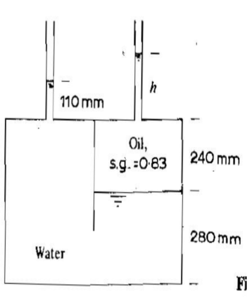

In [30]:
img = Image.open(r"figures/36.png")
img= img.resize((250,300))
img

**Given:**

In [31]:
%%render param
s=0.83 
h_oil =240 #mm
h_tube=110 #mm
h_water=280 #mm

<IPython.core.display.Latex object>

**Hint**

```{toggle}
The pressure in $p_1$ and $p_2$ are the same because is the same fluid in the same height

$$
p_2 = \rho_{oil} g  (h+0.24) \\
p_1= \rho_{water} g  (0.24+0.11)\\
$$

Equalizing both pressures
$$
\rho_{oil} g (h+0.24)=p_1\\
h= \frac {p_1}{\rho _{oil}g -0.24} 
$$
```

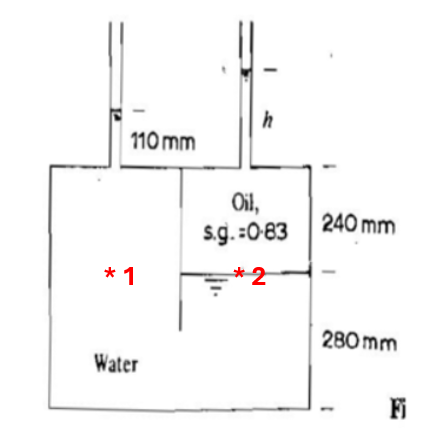

In [32]:
from PIL import Image
img = Image.open(r"figures/36S.png")
img

**Solution**

In [33]:
%%render long 2
rho_oil = s*rho_water
p_1= (h_tube+h_oil)*10**-3*g*rho_water #Pa
h= p_1/(rho_oil*g)-(h_oil*10**-3) #m

<IPython.core.display.Latex object>

---
#### Question 11 (**)

An open tube is attached to a tank as shown below. If the water rises to a height of 800 mm in the tube, what are the pressures pA and pB of the air above the water? Neglect capillary effects. {3.92 kPa, 4.90 kPa}

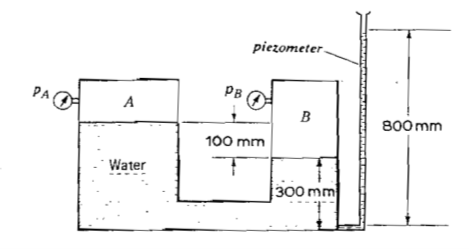

In [34]:
from PIL import Image
img = Image.open(r"figures/37.png")
img

**Given:**

In [35]:
%%render param 1
h_1= 100*10**-3 #m
h_2= 300*10**-3 #m
h_3=800*10**-3 #m

<IPython.core.display.Latex object>

**Hint**

```{toggle}
The pressure can be calculated as $p=\rho_{water}*g*h$  
At point A, $h$ is equal to $h_3-h_2-h_1$  
and at point B, $h$ is equal to $h_3-h_2$  

Note that to convert the pressures from Pa to kPa, the pressures need to be divided by 1000.
```

**Solution**

In [36]:
%%render long 2
p_A= (rho_water*g*(h_3-h_2-h_1))/1000 #kPa
p_B= (rho_water*g*(h_3-h_2))/1000 #kPa

<IPython.core.display.Latex object>

---
#### Question 12 (***)

A submarine is situated 1000 m below sea level. The pressure inside the submarine is controlled. If water inside the submarine boils at a temperature of 90°C, what is the pressure difference between the inside and outside of the submarine? Take the density of sea water as 1 023 kg/m<sup>3</sup>. {10.1 MPa}

**Given:**

In [37]:
%%render param 
h=1000 #m
rho_sea_water=1023 #kg/m3

<IPython.core.display.Latex object>

**Hint**

```{toggle}
For the pressure difference the following equation has to be used: $\Delta p= p_out - p_in$

The pressure outside the submarine can be calculated as the sum of the atmospheric pressure at sea level and the pressure due to the water column above the submarine $p_{out}=p_{atm} + \rho_{seawater}*g*h$ 


The pressure inside the submarine can be determined using the boiling point of water from standard reference tables (Table A.1)
```

**Solution**

In [38]:
%%render long 2
p_out= (p_atm + rho_sea_water*g*h)/1000  #kPa
p_v=70.1 #kPa
Delta_p= p_out-p_v #kPa

<IPython.core.display.Latex object>

## Problems for Lecture 5: Manometry

### Piezometers

---
#### Question 1 (*)

A piezometer is attached to the top of a pressure vessel with a pressure of 25 kPa. If the vessel is filled with a fluid that has a specific gravity of 1.85, how high would the fluid rise in the piezometer? {1.38 m}

**Given:**

In [39]:
%%render param 2
p=25000 #m
s_fluid=1.85

<IPython.core.display.Latex object>

**Hint**

```{toggle}
The height in the piezometer can be calculated as $h=\frac{p}{\rho_{fluid}*g}$  
where $\rho_{fluid}=s_{fluid}*\rho_{water}$
```

**Solution**

In [40]:
%%render long 2
rho_fluid= s_fluid*rho_water #kg/m3
h= p/(rho_fluid*g) #m

<IPython.core.display.Latex object>

---
#### Question 2 (**)

An open tank has two piezometers attached to its side as shown below. The tank contains two immiscible (non-mixing) liquids. Find the a) elevation of the liquid surface in piezometer A, b) elevation of the liquid surface in piezometer B and c) the pressure at the bottom of the tank.  {2 m; 0.819 m; 18.9 kPa}

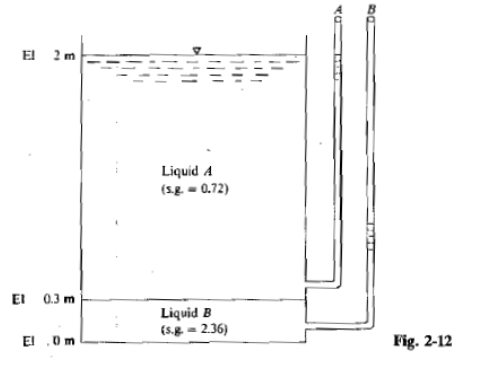

In [41]:
from PIL import Image
img = Image.open(r"figures/40.png")
img

**Given:**

In [42]:
%%render param 
h_t=2 #m
h_B=0.3 #m
s_A=0.72 
s_B=2.36
h_A= h_t-h_B #m


<IPython.core.display.Latex object>

a) 

**Solution**

```{toggle}
The liquid A will simply rise in piezometer A to the same elevation as liquid A in the tank (2m)
```

b)

**Hint**

```{toggle}
To calculate the height of liquid B the following equation should be used: $ p_B=\rho_B*g*h$. Solving for h the equation is $ h_B= \frac {p_B}{\rho_b *g*h}$

The gauge pressure in Liquid B is the pressure exerted by Liquid A at a height of 0.3 m. The pressure of the Liquid A can be calculated using $ p_B=\rho_A*g*h_A$. Considering that $h_A$ is the height of the Liquid A, which isthe difference between the total height of the tank and the height of the liquid B.
```

**Solution**

In [43]:
%%render long 3
p_B= s_A*rho_water*g*(h_A) #Pa
h= p_B/(s_B*g*rho_water) #m
h_liquid_b= h_B+h #m

<IPython.core.display.Latex object>

c)

**Hint**

```{toggle}
The pressure at the bottom is the sum of the pressure exerted by Liquid A and Liquid B
```

**Solution**

In [44]:
%%render long 2
p_bottom = (s_A*g*(h_A))+s_B*g*h_B #kPa


<IPython.core.display.Latex object>

### Barometers

---
#### Question 3(*)

What is the atmospheric pressure if a mercury barometer reads 742 mm? Work from basic principles. Assume &rho;<sub>Hg</sub> = 13 600 kg/m<sup>3</sup>. {99.0 kPa}

**Given:**

In [45]:
%%render param
h=0.742 #m
rho_Hg_=13600 #kg/m3

<IPython.core.display.Latex object>

**Hint**

```{toggle}
Pressure can be estimated as $p=\rho*g*h$.  
In this case, $\rho$ corresponds to the density of mercury and $h$ is the height read in the barometer.
```

**Solution**

In [46]:
%%render long 2
p= rho_Hg_*g*h #Pa
p_kPa= p/1000 #kPa

<IPython.core.display.Latex object>

---
#### Question 4 (**)

A scientist plans to build a water barometer. When the atmospheric pressure is 990 mb abs and the water temperature 70°C, what would you expect the barometer reading to be? {7.07 m} 

**Given:**

In [47]:
%%render param
p_atm_ex= 990 #mb

<IPython.core.display.Latex object>

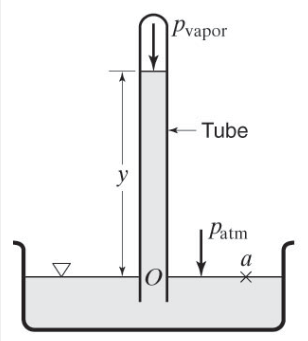

In [48]:
from PIL import Image
img = Image.open(r"figures/42.png")
img

**Hint**

```{toggle}
According to the image of the barometer, atmospheric pressure is the sum of the vapor pressure of the liquid and the pressure of the liquid
$ p_{atm}= p_v+\rho_{liquid}*g*h$  or  $ p_{atm}= p_v+\gamma_{liquid}*h$ 

Read in Table A.1 the specific weight and the saturation vapor presure head in 70°C
```

**Solution**

In [49]:
%%render long 2
gamma= 9.589 #kN/m3
p_v= 31.16 #kN/m2
p_atm_kPa= p_atm_ex*0.1 #kPa
h_barom= p_atm_kPa/gamma-p_v/gamma #m

<IPython.core.display.Latex object>

---
#### Question 5 (***)

A mercury barometer has a reading of 750 mm. Sketch this scenario and work from basic principles to calculate the atmospheric pressure. What is the impact on the reading of ignoring Mercury’s vapour pressure? Assume &rho;<sub>Hg</sub> = 13 550 kg/m<sup>3</sup>. {99.69 kPa; 0.0002 %, i.e. negligible}

**Given:**

In [50]:
%%render param 2
h=0.75 #m
rho_Hg_=13550 #kg/m3

<IPython.core.display.Latex object>

**Hint**

```{toggle}
The atmosferic pressure is equal to the sum of the vapour pressure of mercury and the gauge pressure read in the barometer:  

$$ p_{atm}=p_{vHg}+(\rho_{Hg}*g*h) $$   

  
  
The impact of ignoring the vapor pressure of mercury can be calculated as the fraction that the vapour pressure represents in the atmosferic pressure:  

$$ Effect_{Hg}=\frac{p_{vHg}}{p_{atm}} $$  

Note that, from Table A.4, the vapor pressure of mercury is 0.17 N/m<sup>2</sup>
```

**Solution**

In [51]:
%%render long 4
p_vHg=0.17 #N/m2
p_atm_= p_vHg+(rho_Hg_*g*h) #Pa
p_atm__= p_atm_/1000 #kPa
Effect_Hg= (0.17/p_atm_)*100 #%

<IPython.core.display.Latex object>

### Manometers

---
#### Question 6 (**)[R]

A manometer is attached to a water tank as shown below. Find the height of the free water surface above the bottom of the tank. Work from basic principles. Assume ρ<sub>Hg</sub> = 13 600 kg/m<sup>3</sup>. {2.87 m} 

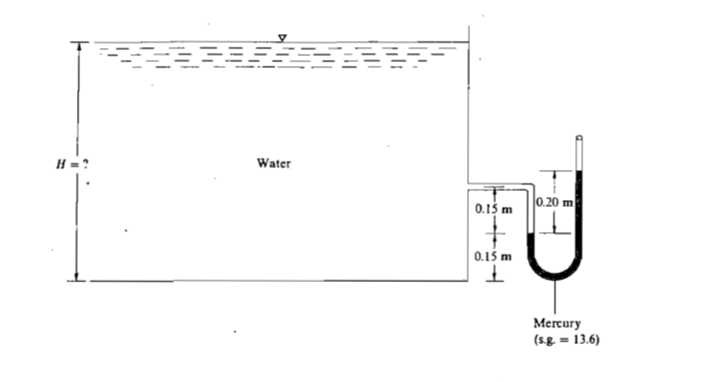

In [52]:
from PIL import Image
img = Image.open(r"figures/44.png")
img

**Given:**

In [53]:
%%render param 
rho_Hg_= 13600 #kg/m3
x_1=0.15 #m
x_2= 0.15 #m
x_3= 0.20 #m

<IPython.core.display.Latex object>

**Hint**

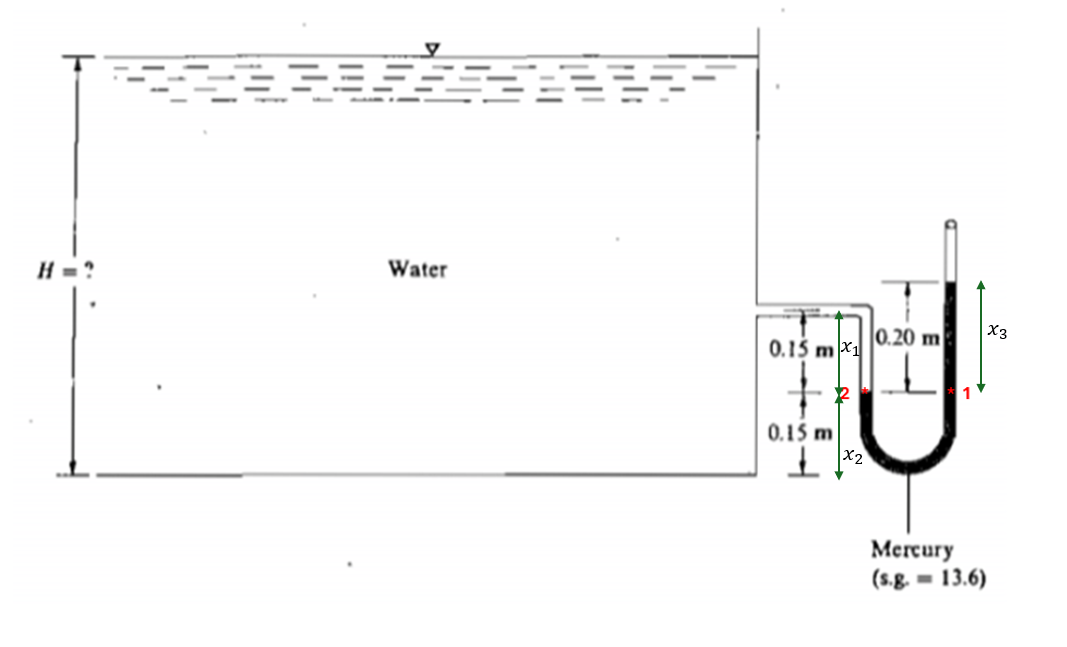

In [54]:
from PIL import Image
img = Image.open(r"figures/44s.png")
img

```{toggle}
$P_1 =P_2 $ because they are on the same level and same fluid 


$$
P_1 = \rho_{Hg} g*x_3\\
P_2 = \rho_{water} g*x_1 + \rho_{water}g(H-x_1 -x_2)\\
$$

Simplyfing $P_2$

$$
P_2 = \rho_{water} g*(H-x_2)
$$

Equalizing the two pressures

$$
\rho_{water} g*(H-x_2)=\rho_{Hg} g*x_3 \\
$$
```


**Solution**

In [55]:
%%render long 2
H= (rho_Hg_*g*x_3)/(rho_water*g)+x_2 #m

<IPython.core.display.Latex object>

---
#### Question 7 (**)[R]

Calculate the difference in manometer mercury levels (y) in the figure below from basic principles. Assume ρ<sub>Hg</sub> = 13 600 kg/m<sup>3</sup>. {626 mm}

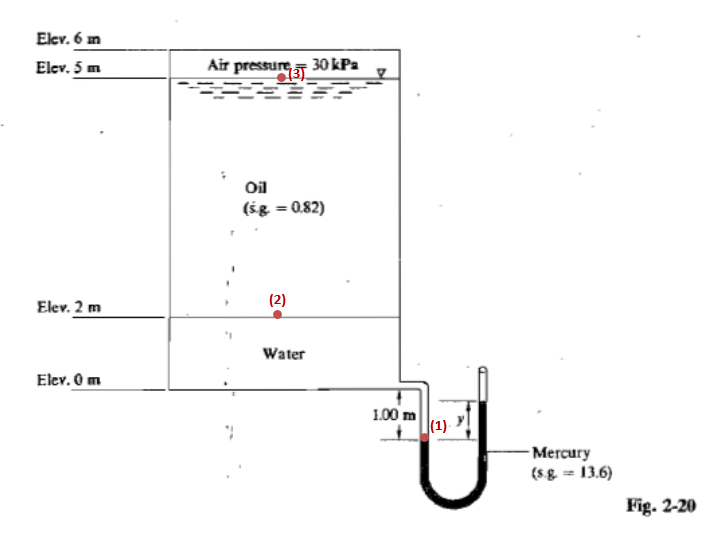

In [56]:
from PIL import Image
img = Image.open(r"figures/45.png")
img

**Given:**

In [57]:
%%render param
rho_Hg_=13600 #kg/m3
s_oil=0.82
h_1=1 #m
h_2=2 #m
h_3=5 #m
h_4=6 #m
p_3=30000 #Pa

<IPython.core.display.Latex object>

**Hint**

```{toggle}
The pressure corresponding to height 'y' is equal to the pressure at (1) because it is the same level and the same fluid. Therefore, this height can be calcuated as:  

$$h=\frac{p_1}{\rho_{Hg}*g}$$  

Additionally, $p_1$ is equal to the sum of the pressure at (2) and the pressure of the water from (2) to (1):  

$$p_1=p_2+\rho_{water}*g*(h_2+h_1)$$  

$p_2$ is equal to the sum of the pressure at (3) and the pressure of the oil from (3) to (2):  

$$p_2=p_3+\rho_{oil}*g*(h_3-h_2)$$  

Remember that $\rho_{oil}=s_{oil}*\rho_{oil}$

```

**Solution**

In [58]:
%%render long 2
rho_oil= s_oil*rho_water #kg/m3
p_2= p_3+rho_oil*g*(h_3-h_2) #Pa
p_1= p_2+rho_water*g*(h_2+(h_1)) #Pa
h_Hg= p_1/(rho_Hg_*g) #m
h_Hg_= h_Hg*1000 #mm


<IPython.core.display.Latex object>

---
#### Question 8 (**)

Calculate the pressure pa in the figure below if the specific gravity of the oil is 0.82. Assume ρ<sub>Hg</sub> = 13 600 kg/m<sup>3</sup> {8.7 kPa}

**Given:**

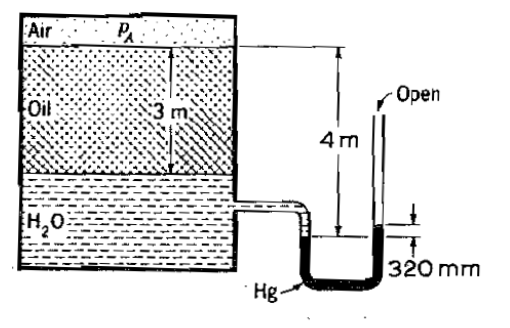

In [59]:
from PIL import Image
img = Image.open(r"figures/46.png")
img

In [60]:
%%render param
rho_Hg_= 13600 #kg/m3
s_oil= 0.82
y_oil= 3 #m
y_man= 320 #mm
y_oil_water= 4 #m 


<IPython.core.display.Latex object>

**Hint**

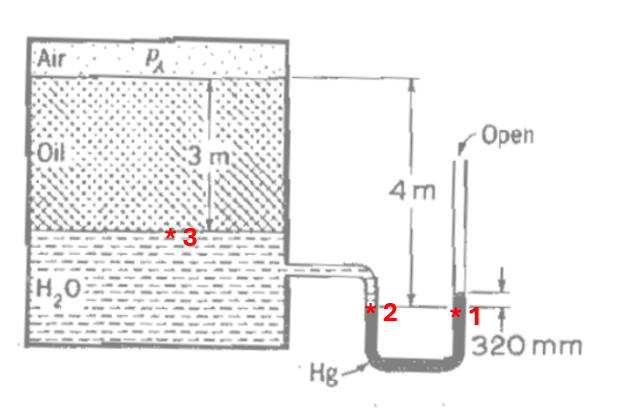

In [61]:
img2 = Image.open(r"figures/46s.png")
img2

```{toggle}
Pressure in 1 and 2 is the same because is a const static fluid. 

$$P_1= P_2 $$

$$
P_1= \rho_{Hg} g y_{man} \\
P_3=P_A + \rho_{oil} g y_{oil}\\
P_2= P_3+ \rho_{water}g (y_{oil_{water}}-y_{oil})
$$

Using the three equations we can arrive at the following

$$
P_A + \rho_{oil} g y_{oil}=-\rho_{water}g (y_{oil_{water}}-y_{oil})+\rho_{Hg} g y_{man}
$$
```

**Solution**

In [62]:
%%render long 2
rho_oil=s_oil*rho_water # kg/m3
P_A= -(rho_oil*g*y_oil)-g*rho_water*(y_oil_water-y_oil)+rho_Hg_*g*y_man/1000 #Pa

<IPython.core.display.Latex object>

---
#### Question 9 (* - ***)

A mercury manometer is used to measure the pressure in a vessel containing water as shown in the figure below. The following measurements were taken:  
h1 = 300mm and h2 = 150mm.  

a.* What was the pressure in the vessel at its center (point A) based on the measured values? {38.4 kPa}  
b.** If the diameter of the pressure vessel is 2m, what is the pressure at its bottom? {48.2 kPa}  
c.*** It is later discovered that an air bubble with an effective height of 10 mm was trapped in the water of the left leg of the manometer when the readings were taken. Calculate the corrected pressure in the container if this bubble is taken into consideration. {38.5 kPa}


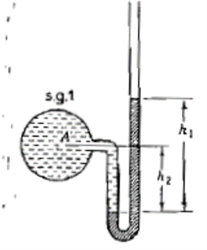

In [63]:
from PIL import Image
img = Image.open(r"figures/47.png")
img

**Given:**

In [64]:
%%render param 2
h_1=0.3 #m
h_2=0.15 #m
d=2 #m
h_bubble=0.01 #m

<IPython.core.display.Latex object>

a)

**Hint**

```{toggle}
Considering that the pressure is the same at the same level in the same fluid, we have the following equation:  

$$
p_A+\rho_{water} g h_2=\rho_{Hg} g h_1
$$

Therefore, solving for $p_A$:  

$$
p_A=\rho_{Hg}gh_1-\rho_{water}gh_2
$$


Note: the Mercury's density can be assumed as $\rho_{Hg}=13550 kg/m^3$
```

**Solution**

In [65]:
%%render long 2
rho_Hg_= 13550 #kg/m3
p_A= rho_Hg_*g*h_1-rho_water*g*h_2 #Pa
p_A_= p_A/1000 #kPa

<IPython.core.display.Latex object>

b)

**Hint**

```{toggle}
The pressure at the bottom is equal to the pressure at A plus the pressure from point A to the bottom. This can be expressed as the following equation:  

$$p_{bottom}=p_{A}+\rho_{water}g\frac{d}{2}$$

```

**Solution**

In [66]:
%%render long 2
p_bottom= p_A+rho_water*g*(d/2) #Pa
p_bottom_= p_bottom/1000 #kPa

<IPython.core.display.Latex object>

c)

**Hint**

```{toggle}
The bubble reduces the height of the water by 10mm, therefore the pressure in the container is:  

$$
p_A=\rho_{Hg}gh_1-\rho_{water}g(h_2-h_{bubble})
$$
```

**Solution**

In [67]:
%%render long 2
p_A= rho_Hg_*g*h_1-rho_water*g*(h_2-h_bubble) #Pa
p_A_= p_A/1000 #kPa

<IPython.core.display.Latex object>

---
#### Question 10 (**)[R]

What is the pressure difference between points A and B in the system below? Work from basic principles. Assume ρ<sub>Hg</sub> = 13550 kg/m<sup>3</sup>. {10.1 kPa}

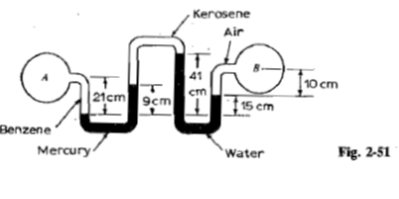

In [68]:
from PIL import Image
img = Image.open(r"figures/48.png")
img

**Given:**

In [69]:
%%render param 
rho_Hg_= 13550 #kg/m3
rho_benz=876 #kg/m3
rho_kero= 808 #kg/m3
rho_air=1.22 #kg/m3
y_benz= 21 #cm 
y_Hg= 9 #cm 
y_water1= 41 #cm 
y_air= 10 #cm 
y_water2= 15 #cm 


<IPython.core.display.Latex object>

**Hint**

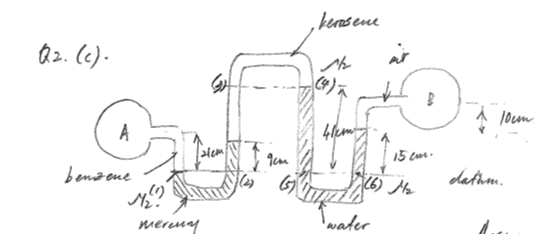

In [70]:
from PIL import Image
img = Image.open(r"figures/48s.png")
img

```{toggle}
Considering that the same fluid at the same height has the same pressure, the following points have equal pressures 
$p_1=p_2, p_3=p_4, p_5=p_6$. 

Furthermore, taking into account that the pressure is greater when a point is lower, that is, the pressures should be added.For exmaple, the pressure in point 1 is higher than the pressure in A. For that reason, $p_1=p_A + \rho_{benz} g y_{benz}$

Considering the points of equal pressure and the statement explained previously, the following equations can be obtained.

$$
p_1=p_A + \rho_{benz} g y_{benz}\\
p_3=p_1-\rho_{Hg}g y_{Hg}-\rho_{kero}g(y_{water_1}-y_{Hg})\\
p_5= p_4 + \rho_{water} g y_{water_1}\\
p_B=p_6-\rho_{water}gh_{kero}-\rho_{air}g y_{air}
$$

For the pressure diference between A and B all the equations should be used. 

$$
\Delta _{p_{AB}}= -\rho_{benz} g y_{benz} + \rho_{Hg}g y_{Hg}+\rho_{kero}g(y_{water_1}-y_{Hg}) - \rho_{water} g y_{water_1}+ \rho_{water}gh_{kero}+\rho_{air}g y_{air}
$$
```

**Solution**

In [71]:
%%render long 2
Delta_p_AB= -rho_benz*g*y_benz/100 +rho_Hg_*g*y_Hg/100+rho_kero*g*(y_water1-y_Hg)/100 -rho_water*g*y_water1/100+rho_water*g*y_water2/100+rho_air*g*y_air/100 #Pa

<IPython.core.display.Latex object>

### Inverted Manometers

---
#### Question 11 (***)

In the figure below, the liquid at A and B is water and the manometer liquid is oil with s = 0.80, h<sub>1</sub> = 300 mm, h<sub>2</sub> = 200 mm, and h<sub>3</sub> = 600 mm. a) Determine the difference between the pressures at A and B. b) if pB = 50 kPa and the barometer reading is 730 mm Hg, find the absolute pressure head at A in meters of water. Assume ρ<sub>Hg</sub> = 13600 kg/m<sup>3</sup>. {-1.37 kPa, 14.9 m abs} 

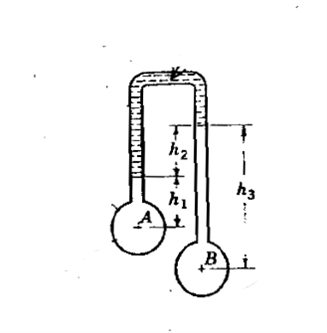

In [72]:
from PIL import Image
img = Image.open(r"figures/49.png")
img

**Given:**

In [73]:
%%render param 1
s_oil=0.8
h_1=0.3 #m
h_2=0.2 #m
h_3=0.6 #m

<IPython.core.display.Latex object>

a)

**Hint**

 ```{toggle}
 The difference between the pressures at A an B can be expressed as follows:  
 
 $$dp_{AB}=-p_3+p_1+p_2$$  
 
 Considering that:  
 
 $$p_1=\rho_{water} g h_1$$
 $$p_2=\rho_{oil} g h_2$$  
 $$p_3=\rho_{water} g h_3$$  
 
 We can reeplace the pressure equations to obtain:  
 
 $$dp_{AB}=-\rho_{water} g h_3+\rho_{water} g h_1+\rho_{oil} g h_2$$ 
 
 ```

**Solution**

In [74]:
%%render long 2
rho_oil= s_oil*rho_water #kg/m3
dp_AB= -rho_water*g*h_3+rho_oil*g*h_2+rho_water*g*h_1 #Pa
dp_AB_= dp_AB/1000 #kPa

<IPython.core.display.Latex object>

b)

**Given:**

In [75]:
%%render param 2
p_B=50000 #Pa
h_Hg= 0.730 #m Hg
rho_Hg_=13600 #kg/m3

<IPython.core.display.Latex object>

**Hint**

```{toggle}
Pressure at A is equal to the pressure at B plus the pressure difference:  

$$p_A=p_B+dp_{AB}$$  
$$p_A=p_B+(-\rho_{water} g h_3+\rho_{water} g h_1+\rho_{oil} g h_2)$$    

Now, to convert Hg height to water height, first, we equal the pressure of water to the pressure of Mercury:  

$$ p_{Hg}=\rho_{Hg} g h_{Hg}$$  
$$p_{water}=\rho_{water} g h_{water}$$  
$$p_{water}=p_{Hg}$$  
$$\rho_{water} g h_{water}=\rho_{Hg} g h_{Hg}$$    

Then, solving for $h_{water}$, we obtain:  

$$h_{water}=\frac{\rho_{Hg} g h_{Hg}}{\rho_{water} g}$$
$$h_{water}=\frac{\rho_{Hg}  h_{Hg}}{\rho_{water} }$$  

```

**Solution**

In [76]:
%%render long 2
p_A= p_B-rho_water*g*h_3+rho_water*g*h_1+rho_oil*g*h_2 #Pa
h_water= (rho_Hg_/rho_water)*h_Hg #m
p_A_abs= p_A/(rho_water*g)+h_water #m abs

<IPython.core.display.Latex object>

---
#### Question 12 (***)[R]

Calculate the pressure at A in the figure below. Work from basic principles. Assume ρ<sub>Hg</sub> = 13550 kg/m<sup>3</sup>. {-12.8 kPa}

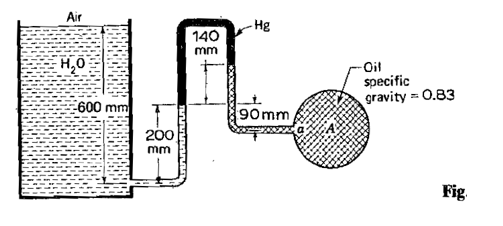

In [77]:
from PIL import Image
img = Image.open(r"figures/50.png")
img

**Given:**

In [78]:
%%render param 
rho_Hg_= 13550 #kg/m3
h_water_tank=600 #mm 
h_water=200 #mm 
h_Hg= 140 #mm 
h_oil=90 #mm 
s_oil= 0.83 

<IPython.core.display.Latex object>

**Hint**

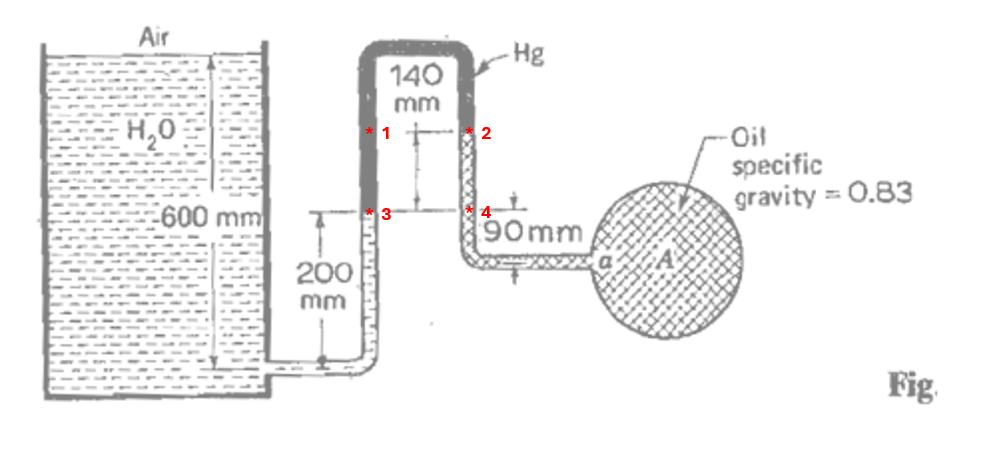

In [79]:
from PIL import Image
img = Image.open(r"figures/50s.png")
img

```{toggle}
Considering that the same fluid at the same height has the same pressure, the following point has equal pressures $p_1=p_2$

$$
p_3= \rho_{water}*g*h_{water tank}-\rho_{water}*g*h_{water}\\
p_1= p_3-\rho_{Hg}*g*h_{Hg}\\
p_4= p_A- \rho_{oil}*g*h_{oil}\\
p_2= p_4- \rho_{oil}*g*h_{oil Hg}\\
$$

Using the equation the pressure in A can be calcualted

$$
\rho_{water}*g*h_{water tank}-\rho_{water}*g*h_{water}-\rho_{Hg}*g*h_{Hg}=p_A- \rho_{oil}*g*h_{oil}- \rho_{oil}*g*h_{oil Hg}
$$
```

**Solution**

In [80]:
%%render long 3
rho_oil=s_oil*rho_water # kg/m3
p_A= rho_water*g*(h_water_tank-h_water)/1000-rho_Hg_*g*h_Hg/1000 +rho_oil*g*(h_oil+h_Hg)/1000 #Pa
p_A_abs= p_A+ p_atm #Pa

<IPython.core.display.Latex object>

---
#### Question 13 (**)

Both gauges in the figure below are calibrated to measure absolute pressure. The gauge A in the figure below reads 290 kPa abs. What is the height h of water? What does gauge B read? Assume ρ<sub>Hg</sub> = 13600 kg/m<sup>3</sup>. {2.23 m; 204 kPa abs}

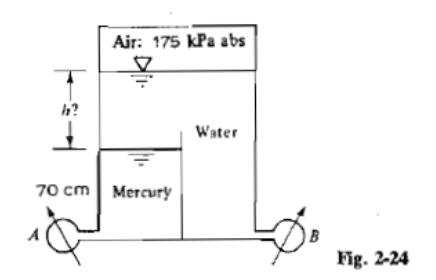

In [81]:
from PIL import Image
img = Image.open(r"figures/51.png")
img

**Given:**

In [82]:
%%render param 1
p_A=290000 #Pa
rho_Hg_=13600 #kg/m3
h_1=0.7 #m
p_air=175000 #Pa abs

<IPython.core.display.Latex object>

**Hint**

```{toggle}
Establishing that:  

$$p_A=\rho_{Hg} g h_1+\rho_{water} g h +p_{air}$$  

We can solve $h$:  

$$h=\frac{p_A-(\rho_{Hg} g h_1)-p_{air}}{\rho_{water} g}$$  

Then, the pressure at B can be calculated as:  

$$p_B=p_{air}+\rho_{water} g (h+h_1)$$  

```

**Solution**

In [83]:
%%render long 2
h= (p_A-rho_Hg_*g*h_1-p_air)/(rho_water*g) #m
p_B= p_air+rho_water*g*(h_1+h) #Pa
p_B_= p_B/1000 #kPa

<IPython.core.display.Latex object>

## Problems for Lecture 6 and 7: Forces on plane surfaces

### Force on a plane surface -uniform pressure distribution

---
#### Question 1 (**)

A force of 460 N is exerted on lever AB, as shown in the figure below. End B is connected to a piston which fits into a cylinder having a diameter of 60 mm. What force FD acts on the large piston if the volume between C and D is filled with air? {15.8 kN} 

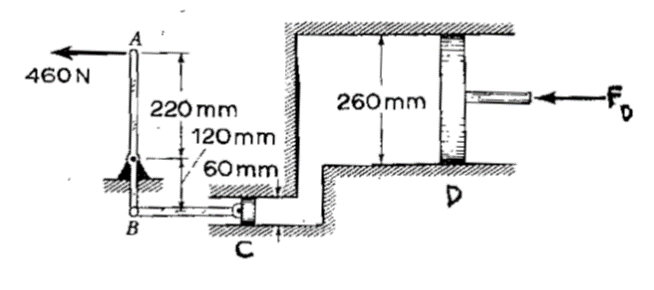

In [84]:
img = Image.open(r"figures/52.png")
img

**Given:**

In [85]:
%%render param
F_A=460 #N
d_C=0.06 #m
d_D=0.26 #m
L_A=0.22 #m
L_C=0.12 #m

<IPython.core.display.Latex object>

**Hint**

```{toggle}
Given that a force Fa is applied at point A of the lever AB, the lever exerts a moment about the pivot. To maintain equilibrium, the moments around the pivot must balance, meaning that the momentum applied at point A has to be equal to the momentum applied at point C. Considering that momentum is force times the distance the following equation can be used.

$$
\sum M=0\\
F_CL_C-F_AL_A=0\\
F_CL_C=F_AL_A
$$

The cylinder between points C and D is filled with air, which means pressure is transmitted evenly throughout the system. Considering that $F=p*A$ the following relationship can be used 

$$
P_C=P_D\\
F_C/A_C=F_D/A_D
$$
```

**Solution**

In [86]:
%%render long 2
F_C= F_A*(L_A/L_C) #N
A_C= pi*(d_C/2)**2 #m2
A_D= pi*(d_D/2)**2 #m2
F_D= (F_C/A_C)*A_D #N

<IPython.core.display.Latex object>

---
#### Question 2 (**)

For the configuration shown below, calculate the weight of the piston if the gauge pressure reading is 70 kPa. { 61.6 kN}

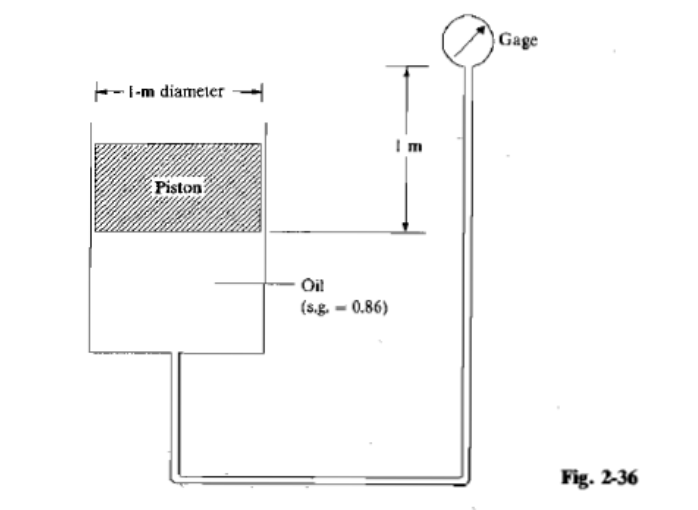

In [8]:
img = Image.open(r"figures/53.png")
img

**Given:**
    

In [21]:
%%render param 2
p_gauge= 70000 #Pa
h_m=1 #m
S_oil=0.86 
d=1 #m

<IPython.core.display.Latex object>

**Hint**

```{toggle}
Since the system is in equilibrium, the force of the piston weight must be equal to the force exerted by the oil. This can be stated by the following equations:

$$ \sum F=0 $$  

$$ -W+F_x=0 $$  

$$ W=F_x $$

Additionally, considering that $F=p A$, the equation is:

$$ W=p A $$

Note that the gauge pressure is one meter above the base of the piston.Therefore, the pressure at the base is equal to the pressure read by the gauge pressure plus the pressure exerted by the oil in the 1-meter column between the gauge and the piston's base:  

$$ W=(p_{gauge} + p_1) A $$

Where $p_1$ can be calculated as:  

$$ p_1=\rho_{oil} g h $$
```

**Solution**

In [20]:
%%render long 2
A= pi*d**2/4 #m2
rho_oil= S_oil*rho_water #kg/m3
W= (p_gauge+rho_oil*g*h_m)*A #N
W_ = W/1000 #kN

<IPython.core.display.Latex object>

### Hydrostatic force on a vertical plane surface 

---
#### Question 3 (*)[R]

A rectangular plate submerged vertically in water is 5 by 4 m, the 5-m side being horizontal and the 4-m side vertical. Determine the magnitude of the force on one side of the plate and the depth to its centre of action if the top edge of the plate is a) at the water surface and b) 1 m below the water surface. Use both the ‘volume under the pressure distribution’ and moment-area methods. {392 kN at 2.67 m; 589 kN at 3.44 m}

**Given:**

In [87]:
%%render param
b= 5 #m
h= 4 #m

<IPython.core.display.Latex object>

a)

**Hint**

```{toggle}
The magnitude of the force is determined with the following equation:

$$F= \rho_{liquid}*g*h_c*A$$

and the depth to its centre of action is $$y_p = \frac {A*y_c^2 +I_c}{A*y_c}$$

Since it is a rectangle, the following equations can be used:

$$
h_c=h /2\\
A= b*h\\
I_c= \frac {b*h^3}{12}
$$
```

**Solution**

In [88]:
%%render long 2
h_c= h/2 #m
A= b*h #m2
F= (rho_water*g*h_c*A)/1000 #kN
y_c= h_c #m
I_c= (b*h**3)/12 #m4
y_p= (A*y_c**2+I_c)/(y_c*A) #m

<IPython.core.display.Latex object>

b)

The same procedure is performed, except that this time the depth below the surface is included to calculate the centroid.

**Solution**

In [89]:
%%render long 2
depth=1 #m
h_c= h/2+depth #m
F= (rho_water*g*h_c*A)/1000 #kN
y_c= h/2+depth #m
y_p= (A*y_c**2+I_c)/(y_c*A) #m

<IPython.core.display.Latex object>

---
#### Question 4 (*)

A vertical plane surface is circular with a diameter of 2 m. If its top edge is 0.5 m below the water surface, find the magnitude of the force on one side of the surface and the depth at which it acts. {46.2 kN at 1.67 m}

**Given:**

In [23]:
%%render param 
d=2 #m 
h_below=0.5 #m 


<IPython.core.display.Latex object>

**Hint**

```{toggle}
The magnitude of the force can be calculated as:

$$ F=\rho g h_c A $$  

And the depth at which it acts can be calculated as:

$$ y_p= y_c+ \frac{I_x}{y_c A}$$  

Where $y_c$ is the distance from the surface of the water to the centroid (in this case: $r+h_{below}$), A is the area of the surface, and  $I_x$ is the second moment of inertia, which for a circular area is:  

$$ I_y = \frac{\pi r^4}{4} $$  
```

**Solution**

In [26]:
%%render long 2
r= d/2 #m
F_mag= rho_water*g*(r+h_below)*pi*d**2/4 #N
F_mag_= F_mag/1000 #kN

I_x= pi*(d/2)**4/4 #m4
y_c= r+h_below #m
A= pi*d**2/4 #m2
y_p= y_c+I_x/(y_c*A) #m

<IPython.core.display.Latex object>

---
#### Question 5 (**)

A water tank is pressurized to 85 cm Hg as shown below. Determine the size of the hydrostatic force per meter width on panel AB, as well as its centre of pressure. {501 kN}

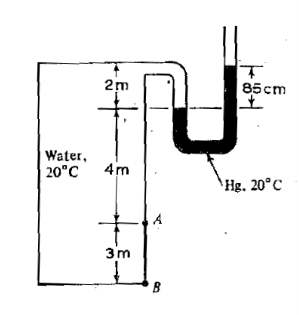

In [90]:
img = Image.open(r"figures/56.png")
img

**Given:**

In [91]:
%%render param
p= 85 #cm Hg
h_1= 2#m
h_2= 4 #m
h_3= 3 #m
h_5= 0.85 #m

<IPython.core.display.Latex object>

**Hint**

```{toggle}
The size of the hydrostatic force is $F= p*A$ and the $p_{AB}$ is $$p_{AB}= p_{Hg}+p_{water}$$

The water pressure and mercury pressure can be calculated as: $p=\rho_{liquid} *g*h$

$$
F= p*A\\
$$
As it is the force per metre width on panel, it can be asumed that the width is 1 m.

$$
F= p*(bh)
$$
```


**Solution**

In [92]:
%%render long 2
p_Hg= rho_Hg*g*h_5 #Pa
p_water= rho_water*g*(h_2+(h_3)/2) #Pa
p_AB= p_Hg+p_water #Pa
F_b= p_AB*h_3 #N

<IPython.core.display.Latex object>

### Hydrostatic force on a plane surface 

---
#### Question 6 (*)


A flat plate is used to close a rectangular opening in a large water tank as shown below. The plate is 3 m wide and 4 m long. What is the magnitude and position of the resultant force of the water on the plate? {605.4 kN at 2.166 m from top of gate along its length}

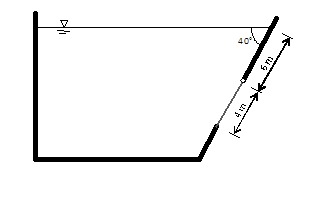

In [446]:
from PIL import Image
img = Image.open(r"figures/57.png")
img

**Given:**

In [29]:
%%render param 
Wide=3 #m
Long=4 #m
theta=40 #°
L_m=6 #m

<IPython.core.display.Latex object>

**Hint**

```{toggle}
The magnitud of the force can be calculated as follows:  

$$
F=\gamma*A*h_c\\
F=\gamma*A*y_c*sen(\theta)
$$  

And the position of the resultant force is:  

$$Y_p = y_c + \frac{I_x}{y_c \cdot A}$$  

Where:  

$$ I_x = \frac{b h^3}{12}$$  

$$ y_c= L_m + \frac{long}{2}$$ 

Additionally, the position of the resultant force from the gate is equal to $y_p$ minus $L_m$
```

**Solution**

In [31]:
%%render long 2
y_c= L_m+Long/2 #m
F_= rho_water*g*y_c*(Wide*Long)*sin(radians(theta)) #N

I_x = (Wide*Long**3)/12 #m4
A_= Wide*Long #m2
y_c= L_m+Long/2 #m
Y_p_=y_c +I_x/(y_c*A_) #m
Y_gate= Y_p_-L_m #m


<IPython.core.display.Latex object>

---
#### Question 7 (*)

A section through a container holding water is shown below. One of the container’s panels is angled at 55° to the horizon and contains a circular gate with a diameter of 2 m. The water is 4 m deep at the top of the gate.  Calculate the size of the resultant force of the water on the gate, as well as its centre of pressure. {148.5 kN; 1.04 m from the top along the gate}

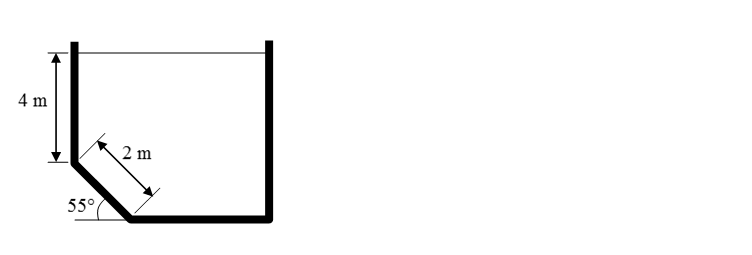

In [94]:
img = Image.open(r"figures/58.png")
img

**Given:**

In [95]:
%%render param
h=4 #m
d=2 #m
theta=55 #°

<IPython.core.display.Latex object>

**Hint**

```{toggle}
The magnitude of the force is determined with the following equation: 

$$F= \rho_{liquid}*g*h_c*A$$

and the depth to its centre of action is $$y_p = \frac {A*y_c^2 +I_c}{A*y_c}$$

Since it is a circle, the following equations can be used:

$$
h_c=h + sin (\theta)*d/2\\
A= \pi R^2\\
I_c= \frac {\pi R^4} {4}
$$
```


**Solution**

In [96]:
%%render long 2
h_c= h+sin(radians(theta))*d/2 #m
A= pi*(d/2)**2 #m2
F= rho_water*g*h_c*A #N
y_surface= h/sin(radians(theta)) #m
y_c= d/2+y_surface #m
I_c= (pi*(d/2)**4)/4 #m4
y_p= (A*y_c**2+I_c)/(y_c*A) #m
y_p_= y_p-y_surface #m (from the top along the gate)

<IPython.core.display.Latex object>

---
#### Question 8 (*)

The container shown in the figure below has a width of 5 m into the screen and is filled with water. A panel BC with cross-sectional shape as shown is installed in one wall. The distances AB and BC are 4 m and 2 m respectively, and the angle θ is 135°. Calculate the resultant force of the water on panel BC and its centre of pressure. {109 kN; 1.05 m from B on BC}

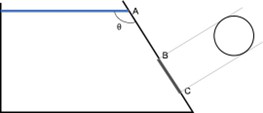

In [455]:
from PIL import Image
img = Image.open(r"figures/59.jpg")
img

**Given:**

In [32]:
%%render param 
Width_=5 #m 
AB= 4#m
BC= 2#m 
theta = 135 #°
theta_rad = (radians(theta)) #radians

<IPython.core.display.Latex object>

**Hint**

```{toggle}
The magnitude of the force is determined with the following equation: 

$$F= \rho_{liquid}*g*h_c*A$$  

and the depth to its centre of action is $Y_p = y_c + \frac{I_x}{y_c \cdot A}$

Since it is a circle, the following equations can be used:

$$
h_c=y_c sin (\theta)\\
A= \pi r^2\\
I_c= \frac {\pi r^4} {4}
$$
```

**Solution**

In [35]:
%%render long 2
y_c_= AB+BC/2 #m
A= pi*BC**2/4 #m2
F_= rho_water*g*y_c_*A*sin(theta_rad) #N

r=BC/2
I_x = pi*r**4/4 #m4
Y_p_=y_c_ +I_x/(y_c_*A) #m
h_p= Y_p_*sin(theta_rad) #m from B on BC

<IPython.core.display.Latex object>

---
#### Question 9 (*)[R]

The container shown in the figure below has a width of 5 m into the page and is filled with water. A panel BC with cross-sectional shape as shown is installed in one wall. The distances AB and BC are 4 m and 2 m respectively, b is 2 m and the angle θ is 135°. Calculate the resultant force of the water on panel BC and its centre of pressure.  {64.7 kN; 0.71 m from B on BC}

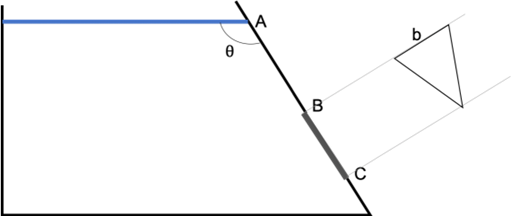

In [98]:
img = Image.open(r"figures/60.png")
img

**Given:**

In [99]:
%%render param
B=5 #m
y_AB=4 #m
y_BC=2 #m
b=2 #m
theta=135 #°

<IPython.core.display.Latex object>

**Hint**

```{toggle}
The magnitude of the force is determined with the following equation: 

$$F= \rho_{liquid}*g*h_c*A$$

and the depth to its centre of action is $y_p = \frac {A*y_c^2 +I_c}{A*y_c}$

Since it is a triangle, the following equations can be used:

$$
h_c= y_c sin(\alpha)\\
y_c=y_{AB}+\frac{y_{BC}}{3}\\
A= b*h/2\\
I_c= \frac {b*h^3}{36}
$$
```

**Solution**

In [100]:
%%render long 2
A= (b*y_BC)/2 #m2
alpha= 180-theta #°
y_c= y_AB+(y_BC/3) #m
h_c= sin(radians(alpha))*(y_c) #m
F= rho_water*g*h_c*A #N
I_c= (b*y_BC**3)/36 #m4
y_p= y_c+I_c/(y_c*A) #m from A
y_p_= y_p-y_AB #m from B

<IPython.core.display.Latex object>

---
#### Question 10 (*)

The container shown in the figure below has a width of 5 m into the screen and is filled with water. A panel BC with cross-sectional shape as shown is installed in one wall. The distances AB and BC are 3 m and 1 m respectively, and the angle θ is 120°. Calculate the resultant force of the water on panel BC and its centre of pressure. {47.72 kN; 0.6 m from B on BC}

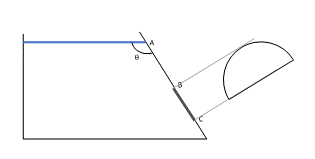

In [463]:
from PIL import Image
img = Image.open(r"figures/61.png")
img

**Given:**

In [37]:
%%render param 
Width_=5 #m 
AB= 3#m
BC= 1#m 
theta = 120 #°
theta_rad = (radians(theta)) #radians


<IPython.core.display.Latex object>

**Hint**

```{toggle}
The magnitude of the force is determined with the following equation: 

$$F= \rho_{liquid}*g*h_c*A$$

Where:  

$$ h_c=y_c sin(\theta)$$  

$$ y_c=AB+BC- \frac{4r}{3\pi}$$

and the depth to its centre of action is $Y_p = y_c + \frac{I_x}{y_c \cdot A}$

Since it is a semi circular area, the following equations can be used:

$$ I_x= (\frac{\pi}{8} - \frac{8}{9\pi}) r^4$$  

$$A=\frac{\pi r^2}{2}$$  

```

**Solution**

In [40]:
%%render long 2

y_c_= AB+BC-4*BC/(3*pi) #m
A= pi*BC**2/2 #m2
F_= rho_water*g*y_c_*A*sin(theta_rad) #N
I_x = 0.1098*BC**4 #m4
Y_p_=y_c_ +I_x/(y_c_*A) #m
h_p= Y_p_*sin(theta_rad) #m from B on BC

<IPython.core.display.Latex object>

---
#### Question 11 (**)[R]

 A 60 cm square gate has its top edge 12 m below the water surface. It is on a 45° angle and its bottom edge is hinged as shown below. What force P is needed to just open the gate? {21.42 kN}

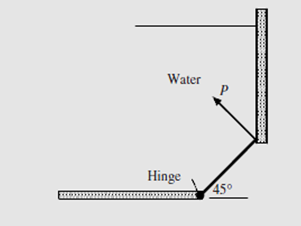

In [101]:
img = Image.open(r"figures/62.png")
img

**Given:**

In [102]:
%%render param 2
A=0.6**2 #m2
h=12 #m
theta=45 #°

<IPython.core.display.Latex object>

**Hint**

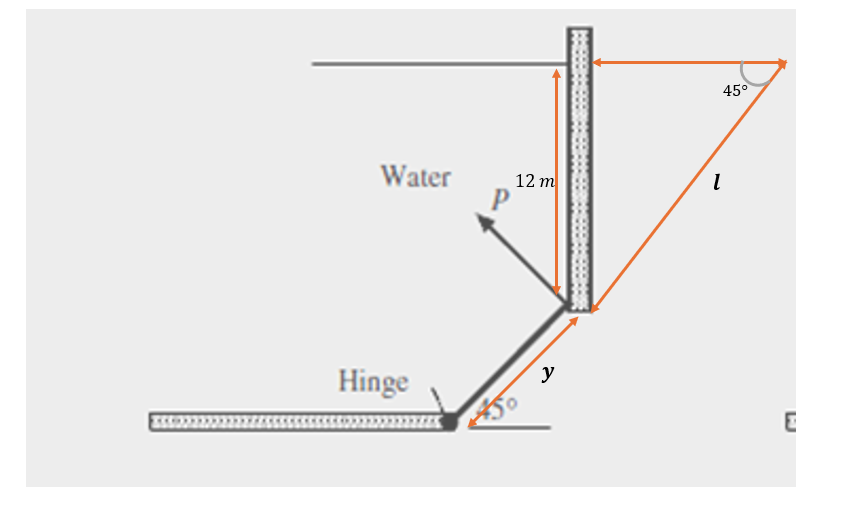

In [103]:
img = Image.open(r"figures/62s.png")
img

```{toggle}
To calculate the force needed to open the gate, it is necessary to perform a moment balance between the hydrostatic force and the force needed to open the gate.

$$
\sum M = 0\\
F_pL_p= F_{water}L_{water}\\
$$

To calculate the hydrostatic force the following equation should be used:

$$F_{water}= \rho_{water}gh_cA$$

Since the force is applied in a square shape, the following equations can be used:

$$
h_c=h + \frac {ysin (\theta)}{2}\\
A= bh\\
I_c= \frac {bh^3}{12}
$$

Considering that $h_c$ is the vertical measurement and $y_c$ is the inclination distance, the following procedure can be made:

$$
y_c= \frac {h_c}{sin(\theta)}\\
$$

Using the $y_c, I_c$ and $A$ the $y_p$ can be calculated using the following equation:

$$y_p = \frac {Ay_c^2 +I_c}{Ay_c}$$

After having the information, the momentum equation can be used considering thw two forces applied in the hinge.
$$
\sum M = 0\\
F_pL_p= F_{water}L_{water}\\
$$

$l_p$ is the distance from the hinge to the point in which the force P is applied 

$l_{water}$ is the distance from the hinge to the point in which the hydrostatic force of the water is applied 
```


**Solution**

In [104]:
%%render long 3
y= sqrt(A) #m
l= h/sin(radians(theta)) #m
h_c= h+y*sin(radians(theta))/2 #m
F_water= rho_water*g*h_c*A #N
y_c= h_c/sin(radians(theta)) #, 
I_c= (y*y**3)/12 #m4
y_p_= y_c+I_c/(y_c*A) #m from surface
y_p= (l+y)-y_p_ #m from hinge
F_p= F_water*y_p/y #N

<IPython.core.display.Latex object>

---
#### Question 12 (***)

The figure below shows a plane pivot gate installed on a concrete dam. The gate is shown in its closed position. The vertical member (AB) has a length of hp = 3.0 m. The horizontal member (BC) has a length bp = 1.5 m. The width of the gate (into the paper) is lp = 10 m. The water level in the reservoir is located at a depth h above the gate’s pivot point (B). When the gate is in its closed position (as shown in the sketch), the gate seals watertight along C. At what depth h will the gate just start to open? {2.6 m}

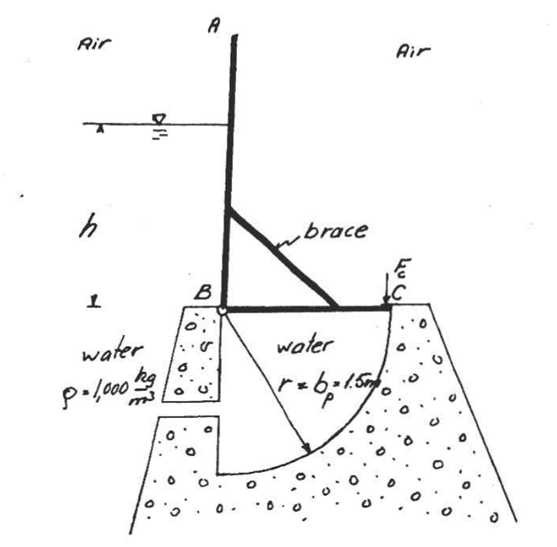

In [473]:
from PIL import Image
img = Image.open(r"figures/63.png")
img

**Given:**

In [41]:
%%render param 1
l_p=10 #m 
h_p= 3#m
b_p= 1.5#m 
theta = 120 #°


<IPython.core.display.Latex object>

**Hint**

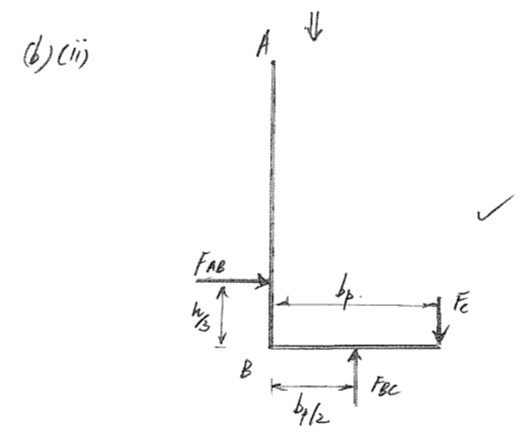

In [42]:
from PIL import Image
img = Image.open(r"figures/63S.png")
img

```{toggle}
Moment around pivot point B 

$$
\sum M= 0\\
F_{AB}*\frac{h}{3} + F_c* b_p -F_{BC}* \frac{b_p}{2}=0\\
F_{AB}= \frac {\rho gh^2l_p}{2}\\
F_{BC}= \rho ghb_pl_p
$$

Replacing $F_{AB}$ and $F_{BC}$

$$
\frac {\rho gh^2l_p}{2}*\frac{h}{3} + F_c* b_p -\rho ghb_pl_p* \frac{b_p}{2}=0\\
\rho gh^2l_p*\frac{h}{6} + F_c* b_p -\rho ghb_pl_p* \frac{b_p}{2}=0\\
$$

$F_C=0$ condition for gate opening

$$
\frac {\rho gh^3l_p}{6b_p} -\rho ghl_p* \frac{b_p}{2}=0\\
$$

Simplifying the equation and calculating h

$$
h= \sqrt {3b_p^2}\\
$$

```

**Solution**

In [44]:
%%render long 2
h=(3*b_p**2)**0.5 #m

<IPython.core.display.Latex object>

## Problems for Lecture 8: Forces on curved surfaces

### Force on a spherical container

---
#### Question 1 (**) [R]

A spherical steel tank of 15 m diameter contains gas under a pressure of 350 kPa. The tank consists of two half-spheres joined together with a weld. What is the total force on the weld? What will the tensile force across the weld be in kN/m? {61.8 MN; 1.31 MN/m}

**Given:**

In [45]:
%%render param
d=15 #m
p=350*1000 #Pa

<IPython.core.display.Latex object>

**Hint**

```{toggle}
The force on the weld can be calculated as:  

$$F=p A$$  

Where $p$ is given and $A=\pi r^2$  

The tensile force across the weld is equal to:  

$$F_{tensile}= \frac{F}{perimeter}$$  

Where $perimeter=\pi d$  

```

**Solution**

In [47]:
%%render long
A= pi*d**2/4 #m2
F_weld= p*A #N

perimeter= pi*d #m
F_tensile= F_weld/perimeter #N/m

<IPython.core.display.Latex object>

---
#### Question 2 (***)

By how much does the pressure inside a 2 mm diameter spherical water droplet exceed the pressure in the surrounding air? Work from basic principles and assume the water/air surface tension to be 0.0735 N/m.  {147 Pa}

**Given:**

In [106]:
%%render param 
d= 2#mm
sigma= 0.0735 #N/m

<IPython.core.display.Latex object>

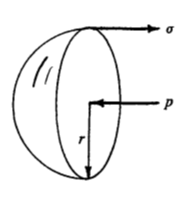

In [107]:
from PIL import Image
img = Image.open(r"figures/65.png")
img

**Hint**

```{toggle}
To calculate the pressure diference in a spherical water droplet, it must be assumed that the droplet is in equilibrium, meaning the sum of forces is equal to 0. Additionally, considering the forces found in the image, the following equations are obtained.

$$
\sum F =0 \\
F_{\sigma}-F_P=0\\
$$

$F_{\sigma}$ is the force of the surface tension 

$$
F_{\sigma}= \sigma l_{circum}\\
F_{\sigma}= \sigma \pi d 
$$

An the $F_p$ is the pressure force

$$
F_p= \Delta p A\\
F_p=\Delta p \frac {\pi d^2}{4}
$$

Replacing the two forces in the sum of forces we have:

$$
\sigma \pi d=\Delta P \frac {\pi d^2}{4}\\
\Delta P =\frac {4\sigma}{d}
$$
```

**Solution**

In [108]:
%%render long 3
Delta_P= 4*sigma/(d/1000) #Pa

<IPython.core.display.Latex object>

---
#### Question 3 (***)

By how much does the pressure inside a 2 mm diameter air bubble in 15 °C water exceed the pressure in the surrounding water?  {147 Pa}

**Given:**

In [49]:
%%render param
d=2/1000 #m
T=15 #°C

<IPython.core.display.Latex object>

**Hint**

```{toggle}
In Table A.1 the surface tension of water at 15°C is: 0.073 N/m  

Cutting the bubble on a plane through its center and considering force equilibrium:  

$$
\sum F_x =0 \\
F_{\sigma}-F_P=0\\
F_{\sigma}= \sigma \pi d \\
F_P=\Delta P \frac {\pi d^2}{4}
$$

Replacing the two forces in the sum of forces we have:

$$
\sigma \pi d=\Delta P \frac {\pi d^2}{4}\\
\Delta P =\frac {4\sigma}{d}
$$
```

**Solution**

In [50]:
%%render long
sigma= 0.0735 #N/m
dP= 4*sigma/d #Pa

<IPython.core.display.Latex object>

---
#### Question 4 (***)[R]

Calculate the gauge pressure inside a 50 mm diameter soap bubble from basic principles. Assume a temperature of 15°C and that the soap does not significantly change the properties of the water. (Tip: note that a soap bubble will have air-fluid surfaces at both its inner and outer diameters) {11.8 Pa}

**Given:**

In [109]:
%%render param 
d=50 #mm 

<IPython.core.display.Latex object>

**Hint**

```{toggle}

In Table A.1 the surface tension of water at 15°C is $\sigma= 0.0735 N/m$

To calculate the pressure diference in a spherical water droplet, it must be assumed that the droplet is in equilibrium, meaning the sum of forces is equal to 0. Additionally, considering the forces found in the image, the following equations are obtained.

$$
\sum F =0 \\
2*F_{\sigma}-F_P=0\\
$$

$F_{\sigma}$ is the force of the surface tension 

$$
F_{\sigma}= 2*\sigma l_{circum}\\
F_{\sigma}= 2*\sigma \pi d 
$$

An the $F_p$ is the pressure force

$$
F_p= \Delta p A\\
F_p=\Delta p \frac {\pi d^2}{4}
$$

Replacing the two forces in the sum of forces we have:

$$
2\sigma \pi d=\Delta P \frac {\pi d^2}{4}\\
\Delta P =\frac {8\sigma}{d}
$$
```

**Solution**

In [110]:
%%render long 2
sigma= 0.0735 #N/m
Delta_P= 8*sigma/(d/1000) #Pa

<IPython.core.display.Latex object>

---
#### Question 5 (***)

The cylindrical tank below has a hemispherical end cap ABC. Calculate the total horizontal force exerted on ABC by the oil and water. {560 kN}

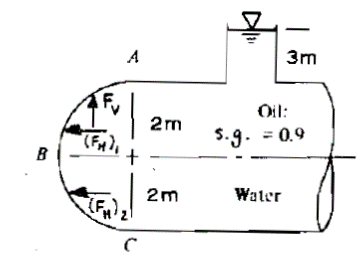

In [493]:
img = Image.open(r"figures/68.png")
img

**Given:**

In [52]:
%%render param
L_AB= 2 #m
L_BC= 2 #m
s_oil= 0.9
h= 3 #m

<IPython.core.display.Latex object>

**Hint**

```{toggle}
The force in AB is:  

$$
F_{AB}=\rho g h_c A
$$  

Where $h_c$ is:  

$$
h_c=3+2-centroid\\
centroid= \frac{4r}{3\pi}
$$  


The force in BC is:  

$$
F_{BC}=\rho_{oil} g h A + \rho_{water} g h_c A
$$  

Where $h_c$ is:  

$$
h_c=centroid\\
centroid= \frac{4r}{3\pi}
$$  

Finally the force ABC is:  

$$
F_{ABC} = F_{AB} + F_{BC}
$$
```


**Solution**

In [53]:
%%render long
rho_oil= s_oil*rho_water #kg/m3
r= 2#m
h_c= h+r-(4*r)/(3*pi) #m
A= (pi*r**2)/2 #m2
F_AB= rho_oil*g*h_c*A #N

F_BC= rho_oil*g*(h+r)*A+rho_water*g*(4*r)/(3*pi)*A #N

F_ABC= F_AB+F_BC #N

<IPython.core.display.Latex object>

---
#### Question 6 (** - ***)[R]

The rectangular tank shown below has a width of 3 m into the page and a maximum water depth of 6 m. One of the bottom edges of the tank consists of a curved panel with a radius of 1 m. 

   a.**Calculate the size and line of action of the horizontal hydrostatic force on the curved panel. {161.9 kN acting 5.515 m from the water surface}

   b.**Calculate the size of the vertical hydrostatic force on the curved panel. {170.3 kN}

   c.***Calculate the line of action of the vertical hydrostatic force on the curved panel. {0.510 m from right tank edge}

   d.**Calculate the size and line of action of the resultant hydrostatic force exerted on the curved panel. {234.95 kN acting at 43.56 ° from the vertical}

   e.***Show that the resultant hydrostatic force acts perpendicularly on the curved panel.


**Given:**

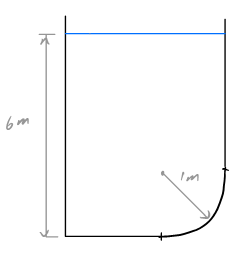

In [111]:
from PIL import Image
img = Image.open(r"figures/69.png")
img

In [112]:
%%render param 
B=3 #m
h=6#m 
r=1#m

<IPython.core.display.Latex object>

a)

**Hint**

```{toggle}
To calculate the magnitud of the horizontal hydrostatic force the following equations should be used:

$$
F_x= \rho g h_c A\\
y_p=y_c + \frac {I_c}{y_cA}
$$

In this case $y_c$ and $h_c$ are the same as there is no inclination.

The horizontal force is calcualted in the vertical projection of the tank. Considering the projection is a rectangular shape, the following equations can be used:

$$
h_c= h_{above curve panel} + \frac {r_{projection}}{2}\\
A= br_{projection}\\
I_c= \frac {br^3}{12}
$$
```

**Solution**

In [113]:
%%render long 2
h_c= (h-r)+r/2 #m
A = B*r
F_x= rho_water*g*h_c*A#N
I_c= B*r**3/12 #m4
y_p= h_c+I_c/(h_c*A)#m

<IPython.core.display.Latex object>

b)

**Hint**

```{toggle}
The vertical force acting on any area is equal to the weight of the volume of liquid above it,for that reason, the following equations can be used. 

$F_y$ = Weight of fluid above the panel 

$$
F_y = \rho g V
$$

The volume for this exercise is the addition between the volume of the rectangule of height 5 m and the volume of a quarter of a circle 
```

**Solution**

In [114]:
%%render long 2
V= pi*r**2*B/4+B*(h-r)*r #m3
F_y= rho_water*g*V #N

<IPython.core.display.Latex object>

c)

**Hint**

```{toggle}
To calculate the line of action of the vertical force, the centroid of the figure must be calculated, which in this exercise is composed of a rectangle and a quarter of a circle.

The centroid of complex figure can be calculated using the following equation:
$$
\bar X = \frac {\sum \bar XA}{\sum A}
$$

The centroid of a quarter of circle is 

$$
X= \frac {4r}{3\pi}\\
$$

The centroid of a rectangle is

$$
X= \frac {h}{2}
$$
```

**Solution**

In [115]:
%%render long 2
A_circ= pi*r**2/4 #m2
A_rect= (h-r)*r #m2
X_circ= 4*r/(3*pi)#m
X_rect= r/2 #m
A_total= A_circ+ A_rect #m2
X= (X_rect*A_rect+X_circ*A_circ)/A_total #m

<IPython.core.display.Latex object>

d)

**Hint**

```{toggle}
The size and line of action of the resultant force can be calculated as:

$$
F_r=\sqrt{F_x^2+F_y^2}\\
tan\theta = \frac {F_x}{F_y}
$$
```

**Solution**

In [116]:
%%render long 2
F_r= sqrt(F_x**2+F_y**2) #N
theta=degrees(atan(F_x/F_y)) #°

<IPython.core.display.Latex object>

e)

**Hint**

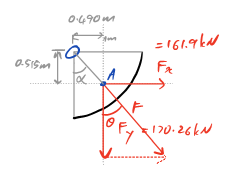

In [117]:
from PIL import Image
img = Image.open(r"figures/69S.png")
img

```{toggle}
To show that the resultant hydrostatic force acts perpendicularly on the curved panel is necessary to calculate the angle between O and A (in the figure above). 

This angle can be calculated with the following equation
$$

tan\theta = \frac {X_O}{Y_O}
$$

Where $X_O$ is the distance between O and the force, meaning the centroid of the vertical force calculated in point c). $Y_O$ is the distance between O and the force, meaning the distance from the surface to where the force is applied, minus the distance from the surface to O (5m).
```

**Solution**

In [118]:
%%render long 2
X_O= X #m
Y_O= y_p-h+r#m
theta=degrees(atan(X_O/Y_O)) #°

<IPython.core.display.Latex object>

### Circumferential stresses in cylindrical container 

---
#### Question 7 (***)

Two identical rigid cylinders with one end open are used in an experiment. Each cylinder has an internal diameter of 20 mm and an internal length of 10 m. The cylinders are placed upright with their open ends at the top under standard sea level conditions as shown in the diagram. Cylinder A is left empty, while cylinder B is completely filled with water. A perfectly sealing frictionless piston is then inserted into each cylinder and loaded with weights to a total mass (including the piston) of 200 kg. Assume the specific constant of air Rs = 287 J/kgK. Determine the following for each cylinder:  

a) The internal pressure at the top of the cylinder (just below the piston). {6.245 MPa}  
b) The equilibrium height of the piston above the floor. Assume that the temperature of the water and gas do not change due to the compression. {160 mm; 9.971 m}  
c) The circumferential stress in the air cylinder wall. Assume a cylinder wall thickness of 20 mm and work from basic principles. {3.123 MPa}


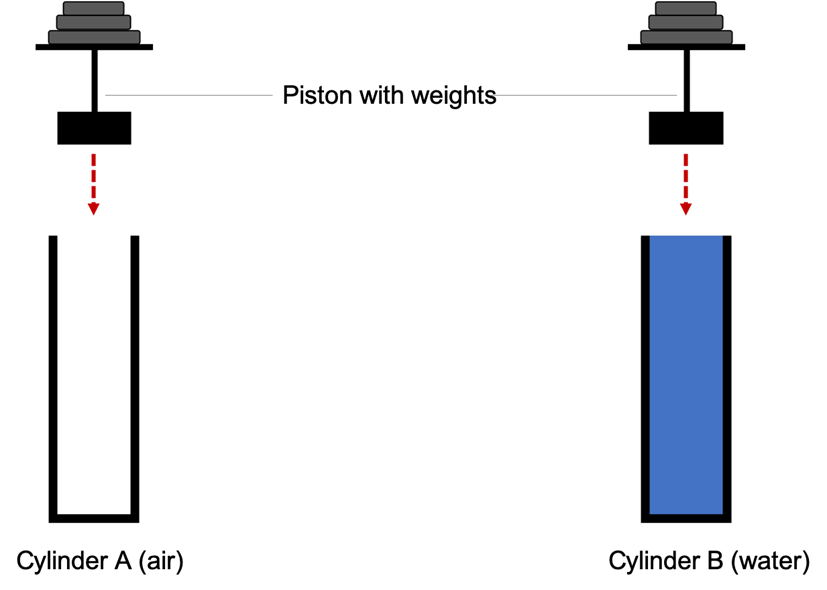

In [506]:
img = Image.open(r"figures/70.png")
img

**Given:**

In [55]:
%%render param
d= 20/1000 #m
L= 10 #m
m= 200 #kg
R_s= 287 #J/kgK

<IPython.core.display.Latex object>

a)

**Hint**

```{toggle}
The internal pressure at the top of the cylinder is calculated the same way in cylinder A and B. It is calculated as follows:  

$$
\sum F_y=0\\
w=pA\\
p=w/A
$$  
```

**Solution**

In [56]:
%%render long 4
w= m*g #N
A= pi*(d/2)**2 #m2
p= w/A #Pa

<IPython.core.display.Latex object>

b)

**Hint**

```{toggle}
**Cylinder A:**

$$
\frac{p}{\rho}=R_s T
$$

Assuming no change in T:

$$
\frac{p_1}{\rho_1}=\frac{p_2}{\rho_2}\\
\rho_2=p_2 \frac{\rho_1}{p_1}
$$  

From Table A.3: $\rho_1=1.225 kg/m^3$ and $p_1=101325 Pa$

From conservation of mass:

$$
\rho_1 Vol_1 =\rho_2 Vol_2\\
\rho_1 AL_1 =\rho_2 AL2
$$

Solving for $L_2$:  

$$
L_2=  \frac{\rho_1 L_1}{\rho_2}
$$  
  
  
    
    

**Cylinder B:**

Considering:

$$
-\Delta p= E_v \frac{\Delta v}{v}\\
v= 1/\rho_{water}
$$

and, from Table A.1 at 15°C, $E_v= 2.14*10^9 Pa$  

$\Delta v$ can be solved.  
Then, considering that:

$$ 
v_2=v+\Delta v\\
\rho_2=\frac{1}{v_2}
$$  

and from conservation of mass:

$$
\rho_1 Vol_1 =\rho_2 Vol_2\\
\rho_1 AL_1 =\rho_2 AL2
$$

$L_2$ can be calculated as:  

$$
L_2=  \frac{\rho_1 L_1}{\rho_2}
$$  
```

**Solution**

In [62]:
%%render long
rho_1A=1.225 #kg/m3
p_1A=101325 #Pa

p_2A= p_1A+p #Pa
rho_2A= p_2A*rho_1A/p_1A #kg/m3

L_1= L #m
L_2A= rho_1A*L_1/rho_2A #m

E_vB=2.14*10**9 #Pa

v_B= 1/rho_water #m3/kg

dv_B= -p/E_vB*v_B #m3
v_2B=v_B +dv_B #m3

rho_2B= 1/v_2B #kg/m3

L_2B= rho_water*L_1/rho_2B #m

<IPython.core.display.Latex object>

c) 

**Hint**

```{toggle}
The circumferential stress in the air cylinder wall can be calculated with the following equation:  

$$
\sum F_x=0\\
PdL=2 \sigma Lt
$$

Solving for $\sigma$:

$$\sigma= \frac{Pd}{2t}$$
```

**Solution**

In [65]:
%%render long 2
t=20/1000 #m
sigma= p*d*L/(2*L*t) #Pa

<IPython.core.display.Latex object>

## Problems for Lecture 9: Buoyancy 

### Basic buoyancy problems

---
#### Question 1 (*)[R]

What is the weight of the loaded barge below? The barge is 7 m in width. {2 703 kN}

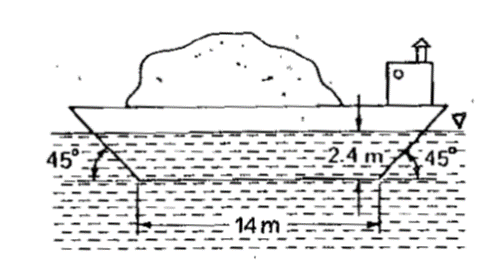

In [119]:
img = Image.open(r"figures/71.png")
img

**Given:**

In [120]:
%%render param
h= 2.4 #m
l= 14 #m
B= 7 #m
theta= 45 #°

<IPython.core.display.Latex object>

**Hint**

```{toggle}
By doing the sum of force in the y axis, the weight of the loaded barge can be calculated

$$
\sum F_y=0\\
F_b-W=0\\
F_b=W\\
\rho g Vol = W
$$

Where the volume is the sum of the rectangle plus the two lateral triangles.

$$
vol= b_{rec}h_{rec}B + \frac {b_{tri}h_{tri}}{2}
$$
```

**Solution**

In [121]:
%%render long 2
theta_ra=radians(theta)
Vol= (h*l*B)+2*(((h*h*tan(theta_ra))/2)*B) #m3
W= rho_water*g*Vol #N

<IPython.core.display.Latex object>

---
#### Question 2 (**)[R]

Determine the magnitude and direction of the force necessary to hold a concrete cube 300 mm on each side completely submerged in a) mercury, and b) water. Assume the density of concrete and mercury as 2 400 kg/m<sup>3</sup> and 13 600 kg/m<sup>3</sup> respectively. {2.97 kN downward, 371 N upward}

**Given:**

In [67]:
%%render param 
L= 300 #mm 
rho_concrete=2400 #kg/m3
rho_Hg=13600 #kg/m3

<IPython.core.display.Latex object>

a)

**Hint**

```{toggle}
By doing the sum of force we can solve the force necessary to hold the cube:

$$
\sum F =0 \\
F+W-F_b=0\\
F=F_b-W
$$  

Where the weight is $W = \rho_{\text{concrete}} \cdot g \cdot \left( \frac{L}{1000} \right)^3$ and the bouyant force is $F_b = \rho_{\text{Hg}} \cdot g \cdot \left( \frac{L}{1000} \right)^3$

```


**Solution**

In [68]:
%%render long 2
W= rho_concrete*g*(L/1000)**3 #N
F_b= rho_Hg*g*(L/1000)**3 #N
F= F_b-W #N

<IPython.core.display.Latex object>

b)

**Hint**

```{toggle}
The cube will sink in water, for this reason, a force F acting upward will be required to hold the concrete in equilibirum and completely sumerged in water. 

$$
\sum F =0 \\
W-F-F_b=0\\
F=W-F_b
$$
```

**Solution**

In [69]:
%%render long 2
W= rho_concrete*g*(L/1000)**3 #N
F_b= rho_water*g*(L/1000)**3 #N
F= W-F_b #N

<IPython.core.display.Latex object>

---
#### Question 3 (**)

A cylinder with diameter 8 cm and height 11 cm floats upright in water with 4 cm sticking out above the water. Determine the weight of the cylinder. {3.45 N}

**Given:**

In [122]:
%%render param
d= 8/100 #m
l= 11/100 #m
h_out= 4/100 #m

<IPython.core.display.Latex object>

**Hint**

```{toggle}
By doing the sum of force in the y axis, the weight of the cylinder can be calculated

$$
\sum F_y=0\\
F_b-w=0\\
F_b=w\\
w=\rho g Vol_{displayed}
$$
```

**Solution**

In [123]:
%%render long 4
A= pi*d**2/4 #m2
h_in= l-h_out #m
Vol_displayed= A*h_in #m3
W= rho_water*g*Vol_displayed #N

<IPython.core.display.Latex object>

---
#### Question 4 (**)

An irregularly shaped metal weighs 300.0 N in air. When it is completely submerged in water, it weighs 232.5 N. Find the volume of the metal. {0.00688 m3}

**Given:**

In [71]:
%%render param 
W_air= 300 #N 
W_water= 232.5 #N 

<IPython.core.display.Latex object>

**Hint**

```{toggle}
When the object is submerged in the water the sum of forces is:

$$W_{air}-W_{water}=F_b$$  

Replacing the bouyant force we have:

$$W_{air}-W_{water}= \rho_{water}gV$$  

Solving the volume:  

$$V= \frac{W_{air}-W_{water}}{\rho_{water}g}$$
```

**Solution**

In [72]:
%%render long 
Vol= (W_air-W_water)/(g*rho_water) #m3

<IPython.core.display.Latex object>

### Floating bodies

---
#### Question 5 (**)

A hollow cube, 1 m on each side, weighs 2.4 kN. The cube is tied to a solid concrete block weighing 10 kN. Will these two objects tied together float or sink in water? The specific gravity of concrete is 2.4. {if fully submerged Fbuoyancy = 14 kN; W = 12.4 kN; thus body will float}

**Given:**

In [124]:
%%render param 1
L= 1 #m
W_hollow= 2.4*1000 #N
W_solid= 10*1000 #N
s= 2.4

<IPython.core.display.Latex object>

**Hint**

```{toggle}
The object will float if the buoyant force is greater than its weight. For that reason, the total weight of the object and the buoyant force should be calculated using the following equations. 

$$
W_{total}= W_{hollow}+ W_{solid}\\
Fb_{total}= Fb_{hollow}+ Fb_{solid}\\
Fb_{total}= \rho g V_{hollow}+ \rho g V_{solid}\\
$$
```

**Solution**

In [125]:
%%render long 1
W_total= W_hollow+W_solid #N

Vol_hollow= L**3 #m3
F_b_hollow= rho_water*g*Vol_hollow #N

rho_solid= s*rho_water #kg/m3
m_solid= W_solid/g #kg
Vol_solid= m_solid/rho_solid #m3
F_b_solid= rho_water*g*Vol_solid #N

F_b= F_b_hollow+F_b_solid #N


<IPython.core.display.Latex object>

$$
F_b>W_{total}\\
$$

The two block tied together will float

---
#### Question 6(**)[R]

A block of steel (s = 7.85) will float at a mercury-water interface as shown below. What will the ratio of distances a to b be for this condition? {0.839}

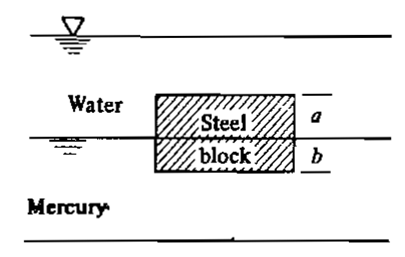

In [532]:
from PIL import Image
img = Image.open(r"figures/76.png")
img

**Given:**

In [533]:
%%render param 
s=7.85 


<IPython.core.display.Latex object>

**Hint**

```{toggle}
Let width of block= c and length of block= d, from the summation of forces, the ratio of distances a to b can be solved as follows:

$$
F_b = W\\
F_b = cda\rho_{water}+cdb\rho_{Hg}\\
W= cd(a+b)\rho_{steel}\\
cda\rho_{water}+cdb\rho_{Hg}=cd(a+b)\rho_{steel}\\
cda1000+cdb13600=cd(a+b)7850\\
a1000+b13600=(a+b)7850\\
1000a-7850a =7850b-13600b\\
 \frac{a}{b}= \frac{7850-13600}{1000-7850}
$$
```

**Solution**

In [534]:
%%render long 
Ratio_ab= (s*rho_water-rho_Hg)/(rho_water-s*rho_water)

<IPython.core.display.Latex object>

---
#### Question 7 (***)

A concrete cube 0.5 m on each side is to be held in equilibrium underwater by attaching a light foam buoy to it. What minimum volume of foam is required? The specific weights of concrete and foam are 23.58 and 0.79 kN/m3 respectively. {0.19 m3}

**Given:**

In [126]:
%%render param
L= 0.5 #m
gamma_concrete= 23.58*1000 #N/m3
gamma_foam= 0.79*1000 #N/m3

<IPython.core.display.Latex object>

**Hint**

```{toggle}
A sum of forces in the y-axis is necesssary to determine the minimum volume of foam

$$
\sum F_y=0\\
W_{foam}+W_{concrete}-F_{bfoam}-F_{bconcrete}=0\\
W_{foam}=-W_{concrete}+F_{bfoam}+F_{bconcrete}\\
$$

Replacing the equation for volume $W= \rho g V$ for each material

$$
\gamma_{foam}Vol_{foam}=-\gamma_{concrete}Vol_{concrete}+\rho_{water}g Vol_{foam}+\rho_{water} g Vol_{concrete}\\
Vol_{foam}(\gamma_{foam}-\rho_{water}g)=\rho_{water} g Vol_{concrete}-\gamma_{concrete}Vol_{concrete}\\
Vol_{foam}=\frac{\rho_{water} g Vol_{concrete}-\gamma_{concrete}Vol_{concrete}}{\gamma_{foam}-\rho_{water}g}
$$
```

**Solution**

In [127]:
%%render long 2
Vol_concrete= L**3 #m3
Vol_foam= (rho_water*g*Vol_concrete-gamma_concrete*Vol_concrete)/(gamma_foam-rho_water*g) #m3

<IPython.core.display.Latex object>

### Advanced buoyancy problems

---
#### Question 8 (***)

A wooden beam (s = 0.64) is 140 mm by 140 mm by 5 m and is hinged at A as shown below. At what angle will the beam float in the water? {19.5 °}

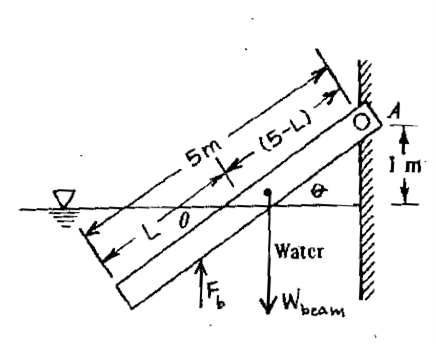

In [537]:
from PIL import Image
img = Image.open(r"figures/78.png")
img

**Given:**

In [11]:
%%render param 
s=0.64 
L_T= 5 #m 
wide=140/1000 #m
b=140/1000 #m
h=1 #m 


<IPython.core.display.Latex object>

**Hint**

```{toggle}

Consider the following equations:  

$$
W=g \cdot s \cdot \rho_{water} \cdot wide\cdot b \cdot L_T\\
F_b= g \cdot wide \cdot b \cdot L\\
X_{F_b}= L_T - \frac {L \cdot cos \theta}{2}\\
X_{W}= \frac {L_T \cdot cos \theta}{2}\\ 
\sum M=0 \\
F_b \cdot X_{F_b}- W \cdot X_{W}=0 \\
$$

Replacing the forces and the distance in the equation of momentum

$$
g \cdot L \cdot wide \cdot b \cdot L_T - \frac {L \cdot cos \theta}{2}- W\frac {L_T \cdot cos \theta}{2} =0 \\
$$

Then we can solve L.  

The angle can be calculated as:

$$
\theta=arcsin(\frac {h}{L_t-L})
$$  

```

**Solution**

In [12]:
%%render long 
W= g*s*rho_water*wide*b*L_T #N

<IPython.core.display.Latex object>

In [19]:
from sympy.solvers import solve
from sympy import Symbol

L = Symbol("L")
ans= solve(rho_water*g*wide*b*L*(L_T-L/2)-W*L_T/2,L)
L_=round(ans[0],1)
print("L: ",L_, "m")

L:  2.00000000000000 m


In [21]:
%%render long 
theta=degrees(asin (h/(L_T-L_))) #°

<IPython.core.display.Latex object>

---
#### Question 9 (***)[R]

Calculate the hydrostatic force and its line of action on a semi-cylindrical indentation ABC per unit width in the figure below. {115 kN at 10.6° above the horizontal}

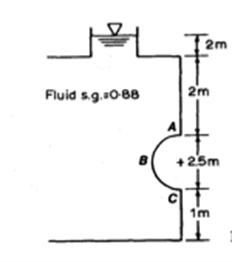

In [128]:
img = Image.open(r"figures/79.png")
img

**Given:**

In [129]:
%%render param
s=0.88
h_1=2 #m
h_2=2 #m
h_3=2.5 #m
h_4=1 #m
B=1#m

<IPython.core.display.Latex object>

**Hint Horizontal Force**

```{toggle}
To calculate the  hydrostatic force, the following equations should be used:

$$
F= \sqrt {F_H^2+F_V^2}
$$

The horizontal force is calculated in the vertical projection of the semi-cylindrical indendation ABC. 

$$
F_H= \rho g h_c A_{projection}\\
A= bh_{projection}\\
I_c= \frac {bh^3}{12}\\
y_p= y_c + \frac {I_c}{y_cA}
$$
```

**Solution Horizontal Force**

In [130]:
%%render long 2
rho= s*rho_water #kg/m3
F_H= rho*g*(h_1+h_2+h_3/2)*(h_3*1) #N
y_c= h_1+h_2+h_3/2 #m
I_c= B*h_3**3/12 #m4
A= B*h_3 #m2
y_p= y_c+ I_c/(y_c*A)#m

<IPython.core.display.Latex object>

**Hint Vertical Force**

```{toggle}
The vertical force acting on any area is equal to the weight of the volume of liquid above it,for that reason, the following equations can be used. 

$F_y$ = Weight of fluid above the panel 

$$
F_V= \rho g Vol
$$

The centroid of a semi-circle is 
$$
X= \frac {4r}{3\pi}
$$
```

**Solution Vertical and Total Force**

In [131]:
%%render long 2
F_V= rho*g*((pi*(h_3/2)**2)*1)/2 #N
X= (4*2.5/2)/(3*pi) #m
F= sqrt(F_H**2+F_V**2) #N
theta= degrees(atan(F_V/F_H)) #°

<IPython.core.display.Latex object>

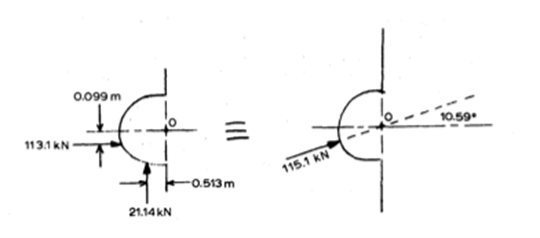

In [132]:
img = Image.open(r"figures/79s.png")
img

---
#### Question 10 (***)

A radial gate is used to seal an opening at the bottom of a dam wall as shown below. The gate is 3 m wide into the page. It has a hinge at O allowing it to be opened by applying a force F as shown. Calculate the size of the buoyancy force on the radial gate. {140.8 kN}

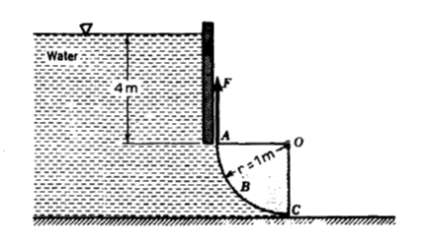

In [547]:
from PIL import Image
img = Image.open(r"figures/80.png")
img

**Given:**

In [548]:
%%render param 
wide= 3 #m 
r= 1#m 
h_water= 4 #m 

<IPython.core.display.Latex object>

**Hint**

```{toggle}
The buoyancy force is:  

$$F_b=\rho_{water}gAwide\\
A= h_{water}r+ \frac{\pi r^2}{4}  
$$
```

**Solution**

In [549]:
%%render long 
F_b= rho_water*g*((h_water*r+(pi*r**2)/4))*wide #N

<IPython.core.display.Latex object>

---
#### Question 11 (* - ***)

A container with cross-section below is filled with water. The container has a width of 5 m into the page. The radius r of the quarter-cylindrical section AB is 2 m. Do the following for the quarter-cylindrical panel AB:  
a) * Calculate the pressure at A and B and draw the pressure distribution on the panel. {19.62 kPa}  
b) ** Calculate the size of the horizontal hydrostatic force. {98.1 kPa}  
c) ** Use the moment of area method to show that the horizontal force in (b) acts (2/3)r below the surface of the water.  {1.333 m = 2/3r}  
d) ** Calculate the size and line of action of the vertical hydrostatic force. {154kN upwards, 0.849 m left of O}  
e) ** Determine the size and direction of the resultant hydrostatic force. {183 kN, 57.5° above the horizontal}  
f) *** Show that the resultant hydrostatic force acts through point O. 


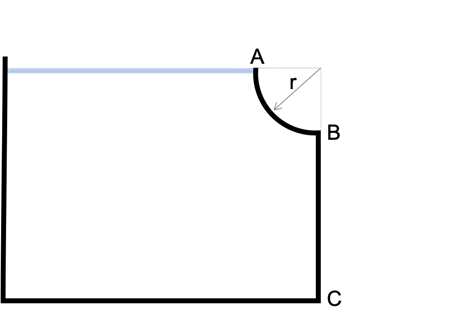

In [133]:
img = Image.open(r"figures/81.png")
img

In [134]:
%%render param
B= 5 #m
r= 2 #m

<IPython.core.display.Latex object>

a)

**Hint**

```{toggle}
In A, atmosferic gauge pressure:

$$
p_A=0
$$

The pressure in B can be calculated using:

$$
p_B= \rho g h
$$
```

**Solution**

In [135]:
%%render long 1
p_B= rho_water*g*r #Pa

<IPython.core.display.Latex object>

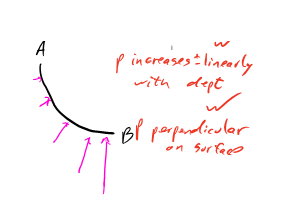

In [136]:
img = Image.open(r"figures/81s.png")
img

b)

**Hint**

```{toggle}
The horizontal force is calculated in the vertical projection 

$$
F_H= \rho g h_c A_{projection}\\
A= bh_{projection}\\
$$
```

**Solution**

In [137]:
%%render long 1
h_c= r/2 #m
A= r*B #m2
F_H= rho_water*g*h_c*A #N

<IPython.core.display.Latex object>

c)

**Hint**

```{toggle}
The moment of area is the following equation 

$$
I_c= \frac {bh^3}{12}\\
y_p= y_c + \frac {I_c}{y_cA}
$$
```

**Solution**

In [138]:
%%render long 2
I_c= b*r**3/12 #m4
Y_p= (A*h_c**2+I_c)/(A*h_c) #m from top of the panel

<IPython.core.display.Latex object>

$$
\frac{2r}{3}=\frac{4}{3}=1.333
$$

d)

**Hint**

```{toggle}
The vertical force acting on any area is equal to the weight of the volume of liquid above it,for that reason, the following equations can be used. 

$F_y$ = Weight of fluid above the panel 

$$
F_V= \rho g Vol\\
F_V=F_B
$$

The line of action is the centroid of the figure
$$
X= \frac {4r}{3\pi}
$$
```

**Solution**

In [139]:
%%render long 2
F_V= rho_water*g*(pi*r**2)/4*b #N
X= (4*r)/(3*pi) #m

<IPython.core.display.Latex object>

e)            

**Hint**

```{toggle}
The size and line of action of the resultant force can be calculated as:

$$
F_r=\sqrt{F_x^2+F_y^2}\\
tan\theta = \frac {F_x}{F_y}
$$
```

**Solution**

In [141]:
%%render long 2
F= sqrt(F_H**2+F_V**2) #N
theta= degrees(atan(F_V/F_H)) #°

<IPython.core.display.Latex object>

f)

**Hint**

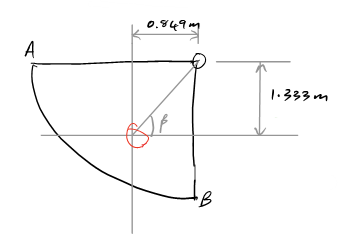

In [142]:
img = Image.open(r"figures/81s2.png")
img

```{toggle}
To show that the resultant hydrostatic force acts perpendicularly on the curved panel is necessary to calculate the angle between O and A (in the figure above). 

This angle can be calculated with the following equation
$$
tan\theta = \frac {X_O}{Y_O}
$$
```

**Solution**

In [143]:
%%render long 2
beta= degrees(atan(Y_p/X)) #°

<IPython.core.display.Latex object>

$$
\beta = \theta\\
$$

Thus F goes through point O

---
#### Question 12 (***)

A glass tube with an internal diameter of 5 mm is inserted into a container filled with mercury. Calculate the depression in the mercury level inside the tube due to capillary forces. Assume a contact angle of 135° between the mercury and the glass. {2.16 mm}

**Given:**

In [561]:
%%render param 
d=5 #mm 
angle= 135 #°
d_m=d/1000 #m

<IPython.core.display.Latex object>

```{toggle}

Using Table A.4 is possible to define the surface tension $\sigma=0.51 N/m$

$$
\sum F=0\\
F_b -F_{\sigma}=0\\
F_b= \frac {\rho g \pi d^2 h }{4}\\
F_{\sigma}= \pi d \sigma cos \theta\\
\frac {\rho g \pi d^2 h }{4}-\pi d \sigma cos \theta=0\\
h= \frac {4\sigma cos \theta}{\rho gd}
$$
```

In [562]:
%%render long 
sigma= 0.51 #N/m
theta=180-angle #°
theta_rad=(radians(theta)) #radians
h=(4*sigma*cos (theta_rad))/(rho_Hg*g*d_m) #m

<IPython.core.display.Latex object>

---
#### Question 13 (* - ****)

A water tank has a quarter-circular panel in one corner as shown in the figure below. 

a.**Calculate the size and line of action of the horizontal hydrostatic force on the panel. {309 kN at 4.519 m below the water surface}

b.***Calculate the size of the vertical force on the panel. {289 kN}

c.****Calculate the line of action of the vertical force on the panel {0.514 m left of side panel}. 

d.****Calculate the size and line of action of the resultant hydrostatic force on the panel. {423 kN at 43.1° below the horizontal}


**Given:**

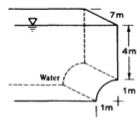

In [144]:
from PIL import Image
img = Image.open(r"figures/83.png")
img

In [145]:
%%render param 
B= 7 #m 
r= 1#m 
h_water= 4 #m 

<IPython.core.display.Latex object>

a)

**Hint**

```{toggle}
To calculate the  hydrostatic force, the following equations should be used:

$$
F= \sqrt {F_H^2+F_V^2}
$$

The horizontal force is calculated in the vertical projection of the semi-cylindrical indendation ABC. 

$$
F_H= \rho g h_c A_{projection}\\
A= bh_{projection}\\
I_c= \frac {bh^3}{12}\\
y_p= y_c + \frac {I_c}{y_cA}
$$
```

**Solution**

In [146]:
%%render long 1
h_c= h_water+r/2 #m
A= B*r #m2
F_H= rho_water*g*h_c*A #N
I_c= B*r**3/12 #m4

y_p= h_c+I_c/(h_c*A) #m

<IPython.core.display.Latex object>

b)

**Hint**

```{toggle}
The vertical force acting on any area is equal to the weight of the volume of liquid above it,for that reason, the following equations can be used. 

$F_y$ = Weight of fluid above the panel 

$$
F_V= \rho g Vol
$$

$$
W=\rho g [(h_{water}+r)r-\frac {\pi r^2}{4}]*B\\
F_W= \rho g (h_{water}+r) r *B\\
F_B= \rho g \frac {\pi r^2}{4}*B
$$
```

**Solution**

In [147]:
%%render long 1
F_W= rho_water*g*(h_water+r)*r*B#N
F_B= rho_water*g*pi*r**2*B/4 #N
F_V= F_W-F_B #N

<IPython.core.display.Latex object>

c)


**Hint**

```{toggle}
To calculate the line of action is necessary to use the moment equation 

$$
F_V\bar X= F_{B} \bar X_{B}- F_{w} \bar X_{w}
$$

Where: 

$ F_W $ is acting in the middle from O 


$F_V$ is acting at $ X= \frac{4r}{3\pi}$
```

**Solution**

In [148]:
%%render long 1

X_W= r/2 #m
X_B = 4*r/(3*pi) #m 
X= (F_W*X_W -F_B*X_B)/ F_V #m

<IPython.core.display.Latex object>

d)

**Hint**

```{toggle}
The size and line of action of the resultant force can be calculated as:

$$
F_R= \sqrt {F_H^2+F_V^2}\\
tan\theta= \frac {F_V}{F_H}
$$
```

**Solution**

In [149]:
%%render long 1
F_R= sqrt(F_H**2+F_V**2) #N
theta= degrees(atan(F_V/F_H)) #°

<IPython.core.display.Latex object>

---
#### Question 14 (** - ****)

A radial gate is used to seal an opening at the bottom of a dam wall as shown below. The gate is 3 m wide into the page. It has a hinge at O allowing it to be opened by applying a force F as shown. Do the following:  

a.	**Calculate the size and line of action of the horizontal hydrostatic force on the gate. {132.4 kN 4.519 m below the surface}

b.	***Calculate the size of the vertical hydrostatic force on the gate. {140.8 kN}

c.	****Calculate the line of action of the vertical hydrostatic force on the gate. {0.424 m left of OC}

d.	****Calculate the size and line of action of the resultant hydrostatic force on the gate. {193.3 kN acting at 46.8° above the horizontal}

e.	****Show that the hydrostatic force acts through the hinge O. 

f.	****What does this mean for the size of force required to open the gate? 

g.	How could you have known the answer for (c) without calculating the resultant hydrostatic force? 


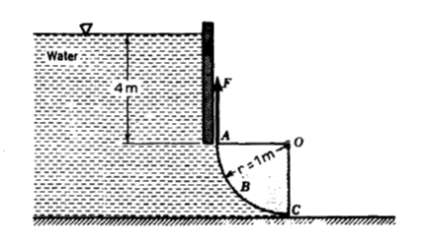

In [570]:
from PIL import Image
img = Image.open(r"figures/84.png")
img

**Given:**

In [84]:
%%render param 
wide= 3 #m 
r= 1#m 
h_water= 4 #m 

<IPython.core.display.Latex object>

a)

**Hint**

```{toggle}

$$
F_H=\rho g h_c A
$$

```

**Solution**

In [85]:
%%render long 
h_c= h_water+r/2 #m
A= wide*r #m2
F_H= rho_water*g*h_c*A #N
I_c= wide*r**3/12 #m4

y_p= h_c+I_c/(h_c*A) #m

<IPython.core.display.Latex object>

b)

**Hint**

```{toggle}
 
$$
F_v= \rho g V
$$

```

**Solution**

In [86]:
%%render long 
V= h_water*r*wide + pi*r**2*wide/4 #m3
F_v= rho_water*g*V #N

<IPython.core.display.Latex object>

c)

**Hint**

```{toggle}
$$
W\bar X= W_{circle} \bar X_{circle}+ W_{rect} \bar X_{rect}
$$
```

**Solution**

In [87]:
%%render long 
X_circle = 4*r/(3*pi) #m
X_rect= r/2 #m
W_circle= rho_water*g*pi*r**2*wide/4 #N
W_rect= rho_water*g*wide*r*h_water #N
X= (W_circle*X_circle+W_rect*X_rect)/(W_circle+W_rect)#m

<IPython.core.display.Latex object>

d)

**Hint**

```{toggle}

$$
F_R= \sqrt {F_H^2+F_V^2}\\
tan\theta= \frac {F_v}{F_H}
$$
```

**Solution**

In [574]:
%%render long 
F_R= sqrt(F_H**2+F_v**2) #N
theta= degrees(atan(F_v/F_H)) #°

<IPython.core.display.Latex object>

e)

**Hint**

```{toggle}
$$
\theta=arctan(\frac{F_v}{H_H})
$$
```

**Solution**

In [89]:
%%render long 
alpha= degrees(atan((y_p-h_water)/X))#°


<IPython.core.display.Latex object>

```{toggle}
The angles are igual, for that reason the force acts through O.
```

f)

**Solution**

```{toggle}
Only determined by weight of the gate hydrostatic force does not contribute to F as it acts through hinge O.
```

g)

**Hint**

```{toggle}
Pressure vectors all act through O.
```

**Solution**

In [576]:
%%render long 
X_circle = 4*r/(3*pi) #m
X_rect= r/2 #m
W_circle= rho_water*g*pi*r**2*wide/4 #N
W_rect= rho_water*g*wide*r*h_water #N
X= (W_circle*X_circle+W_rect*X_rect)/(W_circle+W_rect)#m

<IPython.core.display.Latex object>